In [146]:
import os
os.environ["MODIN_ENGINE"] = "dask"  # Use Dask as the execution engine

import modin.pandas as pd

In [147]:
# Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import dask.array as da
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.utils import shuffle
from sklearn.base import clone
import seaborn as sns
import pandas as pd

In [201]:
file_path = "MyMNIST.csv"
df = pd.read_csv(file_path)
df.head()

label        X1        X2        X3        X4        X5        X6  \
0      5  0.597901  0.643584  0.440604  0.343898  0.461947  0.416898   
1      2  0.472604  0.532625  0.474542  0.357355  0.482233  0.460961   
2      8  0.390808  0.564500  0.750743  0.529714  0.452906  0.441898   
3      3  0.479908  0.443553  0.470933  0.376622  0.293258  0.478515   
4      3  0.503030  0.563502  0.485077  0.386442  0.746835  0.566683   

         X7        X8        X9  ...      X775      X776      X777      X778  \
0  0.511192  0.435197  0.619519  ...  0.500525  0.522769  0.716105  0.380985   
1  0.548812  0.434002  0.701523  ...  0.398520  0.511275  0.574187  0.489968   
2  0.295327  0.449851  0.624780  ...  0.505690  0.421549  0.519030  0.456393   
3  0.625402  0.609754  0.413579  ...  0.426354  0.482817  0.458483  0.448484   
4  0.460144  0.426270  0.456271  ...  0.544838  0.580052  0.485720  0.584563   

       X779      X780      X781      X782      X783      X784  
0  0.775887  0.632974  0.347383  0.508396  0.605311  0.500352  
1  0.481363  0.458289  0.581855  0.552876  0.715812  0.497007  
2  0.527258  0.615760  0.442095  0.385552  0.416821  0.417482  
3  0.557026  0.595983  0.501190  0.601590  0.357040  0.512346  
4  0.594136  0.588852  0.745012  0.522375  0.498912  0.332392  

[5 rows x 785 columns]

In [149]:
labels = df["label"]
df = df.drop(["label"], axis=1)

In [150]:
labels.head()

0    5
1    2
2    8
3    3
4    3
Name: label, dtype: int64

In [151]:
df.head()

X1        X2        X3        X4        X5        X6        X7  \
0  0.597901  0.643584  0.440604  0.343898  0.461947  0.416898  0.511192   
1  0.472604  0.532625  0.474542  0.357355  0.482233  0.460961  0.548812   
2  0.390808  0.564500  0.750743  0.529714  0.452906  0.441898  0.295327   
3  0.479908  0.443553  0.470933  0.376622  0.293258  0.478515  0.625402   
4  0.503030  0.563502  0.485077  0.386442  0.746835  0.566683  0.460144   

         X8        X9       X10  ...      X775      X776      X777      X778  \
0  0.435197  0.619519  0.384391  ...  0.500525  0.522769  0.716105  0.380985   
1  0.434002  0.701523  0.378771  ...  0.398520  0.511275  0.574187  0.489968   
2  0.449851  0.624780  0.509748  ...  0.505690  0.421549  0.519030  0.456393   
3  0.609754  0.413579  0.494705  ...  0.426354  0.482817  0.458483  0.448484   
4  0.426270  0.456271  0.532219  ...  0.544838  0.580052  0.485720  0.584563   

       X779      X780      X781      X782      X783      X784  
0  0.775887  0.632974  0.347383  0.508396  0.605311  0.500352  
1  0.481363  0.458289  0.581855  0.552876  0.715812  0.497007  
2  0.527258  0.615760  0.442095  0.385552  0.416821  0.417482  
3  0.557026  0.595983  0.501190  0.601590  0.357040  0.512346  
4  0.594136  0.588852  0.745012  0.522375  0.498912  0.332392  

[5 rows x 784 columns]

In [152]:
df.describe()

X1            X2            X3            X4            X5  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.521230      0.521252      0.520940      0.521466      0.521691   
std        0.100167      0.099019      0.100162      0.099782      0.100238   
min        0.090766      0.082970      0.110602      0.094140      0.122741   
25%        0.453909      0.454524      0.452995      0.454246      0.454016   
50%        0.520782      0.521446      0.520678      0.521653      0.521213   
75%        0.588729      0.588346      0.588707      0.588591      0.589309   
max        0.910329      0.919882      0.934654      0.937793      0.956802   

                 X6            X7            X8            X9           X10  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.520971      0.521215      0.521300      0.521446      0.520775   
std        0.099676      0.100053      0.099723      0.100283      0.100124   
min        0.097385      0.128061      0.113990      0.109825      0.087629   
25%        0.453340      0.454110      0.453816      0.453680      0.453603   
50%        0.521378      0.521241      0.520903      0.520656      0.520532   
75%        0.588422      0.588424      0.588469      0.589003      0.588739   
max        1.011815      0.915484      0.922272      1.297499      1.117980   

       ...          X775          X776          X777          X778  \
count  ...  50000.000000  50000.000000  50000.000000  50000.000000   
mean   ...      0.521510      0.521029      0.520950      0.521137   
std    ...      0.102611      0.100456      0.100479      0.100151   
min    ...      0.100566      0.067745      0.109487      0.079253   
25%    ...      0.453420      0.453479      0.452744      0.453705   
50%    ...      0.521227      0.520756      0.521009      0.521259   
75%    ...      0.588662      0.588407      0.588447      0.588551   
max    ...      1.498547      1.506254      1.454397      1.408765   

               X779          X780          X781          X782          X783  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.521285      0.520634      0.520586      0.520968      0.520801   
std        0.100093      0.100342      0.099749      0.099782      0.100385   
min        0.098537      0.078780      0.074575      0.139337      0.031802   
25%        0.454120      0.453369      0.453062      0.453530      0.452696   
50%        0.521770      0.520324      0.521096      0.520979      0.520900   
75%        0.588118      0.587908      0.588453      0.587793      0.588539   
max        1.390672      0.925516      0.917507      0.942605      0.932318   

               X784  
count  50000.000000  
mean       0.521228  
std        0.100232  
min        0.094775  
25%        0.453225  
50%        0.522006  
75%        0.589329  
max        0.942814  

[8 rows x 784 columns]

In [16]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 784 entries, X1 to X784
dtypes: float64(784)
memory usage: 299.1 MB


In [17]:
# Check the distribution of labels
label_counts = labels.iloc[:].value_counts()
print(label_counts)

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


label
1    5621
7    5211
3    5129
2    4971
9    4931
6    4920
0    4915
8    4910
4    4847
5    4545
Name: count, dtype: int64


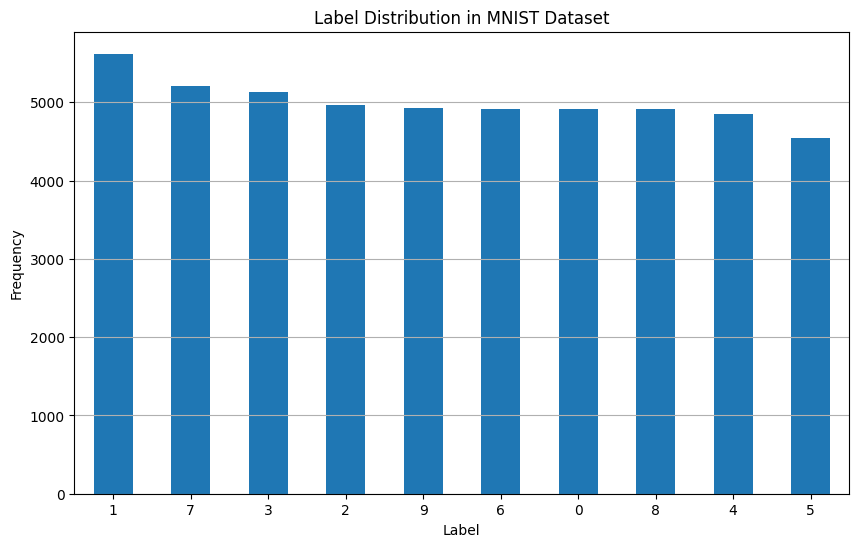

In [10]:
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution in MNIST Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [18]:
labels = labels.to_numpy()

In [19]:
# Function to plot images
def plot_mnist_images(df, num_images=10):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        # Select an image
        img = df.iloc[i, 0:].to_numpy().reshape(28, 28)
        label = df.iloc[i, 0]
        
        # Plot the image
        plt.subplot(num_images // 5 + (num_images % 5 > 0), 5, i + 1)
        plt.imshow(img, cmap='binary')
        plt.title(f'Label: {label:.5f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

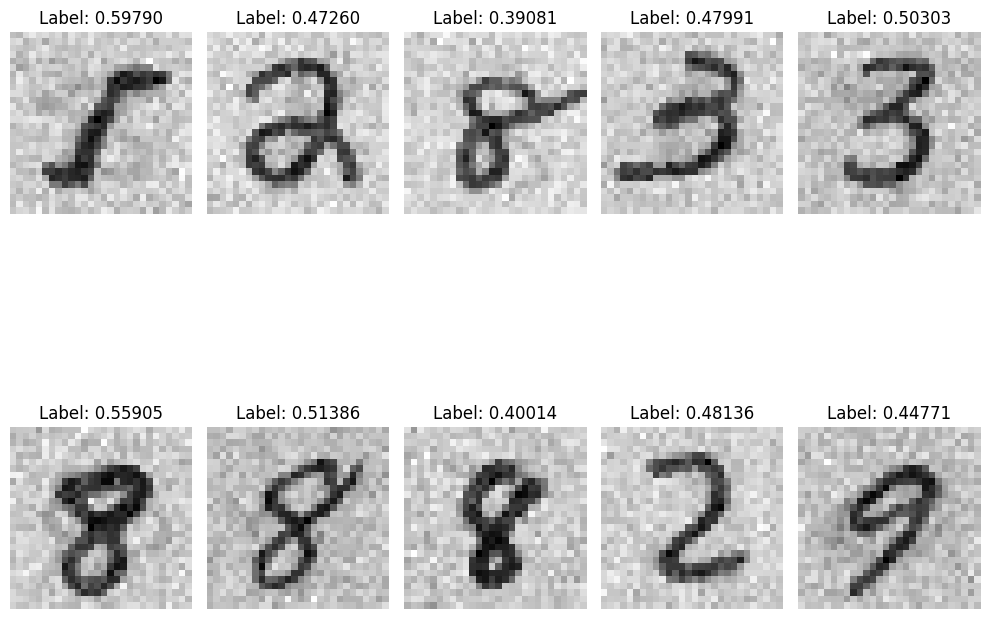

In [18]:
# Plot the first 10 images in the original dataset
plot_mnist_images(df, num_images=10)

In [12]:
df.head()

X1        X2        X3        X4        X5        X6        X7  \
0  0.597901  0.643584  0.440604  0.343898  0.461947  0.416898  0.511192   
1  0.472604  0.532625  0.474542  0.357355  0.482233  0.460961  0.548812   
2  0.390808  0.564500  0.750743  0.529714  0.452906  0.441898  0.295327   
3  0.479908  0.443553  0.470933  0.376622  0.293258  0.478515  0.625402   
4  0.503030  0.563502  0.485077  0.386442  0.746835  0.566683  0.460144   

         X8        X9       X10  ...      X775      X776      X777      X778  \
0  0.435197  0.619519  0.384391  ...  0.500525  0.522769  0.716105  0.380985   
1  0.434002  0.701523  0.378771  ...  0.398520  0.511275  0.574187  0.489968   
2  0.449851  0.624780  0.509748  ...  0.505690  0.421549  0.519030  0.456393   
3  0.609754  0.413579  0.494705  ...  0.426354  0.482817  0.458483  0.448484   
4  0.426270  0.456271  0.532219  ...  0.544838  0.580052  0.485720  0.584563   

       X779      X780      X781      X782      X783      X784  
0  0.775887  0.632974  0.347383  0.508396  0.605311  0.500352  
1  0.481363  0.458289  0.581855  0.552876  0.715812  0.497007  
2  0.527258  0.615760  0.442095  0.385552  0.416821  0.417482  
3  0.557026  0.595983  0.501190  0.601590  0.357040  0.512346  
4  0.594136  0.588852  0.745012  0.522375  0.498912  0.332392  

[5 rows x 784 columns]

In [153]:
# Convert the DataFrame to a NumPy array
data = df.to_numpy()
data.shape

(50000, 784)

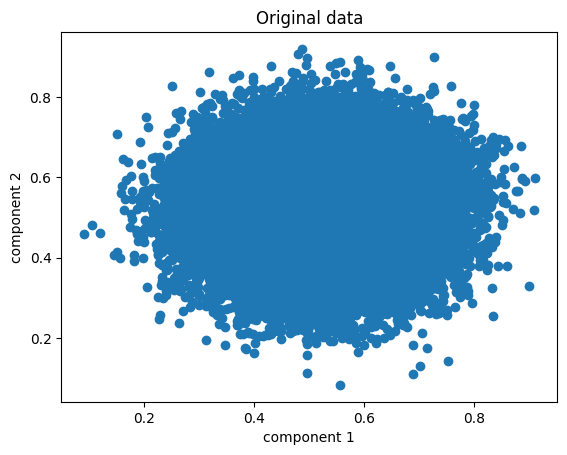

In [15]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Original data")
plt.show()

In [27]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

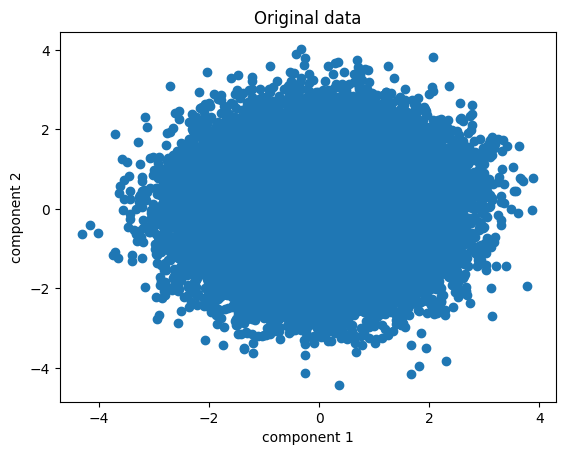

In [17]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.title("Original data")
plt.show()

In [171]:

def display_images(labels,reconstructed):
    image_shape = (28, 28)
    """Display reconstructed images for comparison."""
    unique_labels = np.unique(labels)
    num_labels = len(unique_labels)
    fig, axes = plt.subplots(1, num_labels, figsize=(2 * num_labels, 5))  # Adjusted the figsize

    for i, label in enumerate(unique_labels):
        # Get the first sample for the current label
        idx = np.where(labels == label)[0][0]

        # Reconstructed Image
        img = axes[i].imshow(reconstructed[idx].reshape(image_shape), cmap='RdGy')
        axes[i].set_title(f"Reconstructed: {label}")
        axes[i].axis('off')
        
    # Add a single colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(img, cax=cbar_ax)
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
    plt.show()


In [ ]:

def display_images_avg(labels,reconstructed):
    image_shape = (28, 28)
    """Display reconstructed images for comparison."""
    unique_labels = np.unique(labels)
    num_labels = len(unique_labels)
    fig, axes = plt.subplots(1, num_labels, figsize=(2 * num_labels, 5))  # Adjusted the figsize

    for i, label in enumerate(unique_labels):
        # Get the first sample for the current label
        idx = np.where(labels == label)[0][0]

        # Reconstructed Image
        img = axes[i].imshow(reconstructed[idx].reshape(image_shape), cmap='RdGy', vmin=-1.5, vmax=1.5)
        axes[i].set_title(f"Reconstructed: {label}")
        axes[i].axis('off')
        
    # Add a single colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(img, cax=cbar_ax)
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for colorbar
    plt.show()


# Dimension reduction technique

## Linear dimension redcuction

In [19]:
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline



# # Randomly sample a subset of the data
# sample_size = 5000  # Define the sample size
# X_sample, _, y_sample, _ = train_test_split(data, labels, train_size=sample_size, stratify=labels, random_state=42)


# # Set up a pipeline with KernelPCA and an SVM classifier
# pipeline = Pipeline([
#     ('nmf', NMF(init='random', solver='mu', max_iter=10000)),
#     ('svc', SVC())
# ])

# # Define the parameter grid
# param_grid = {
#     'nmf__n_components': [2,10,50,100],
#     'svc__C': [0.1, 1, 10,100]  # Example C values for SVM
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_sample, y_sample)



In [20]:
# # Best number of components
# best_n_components = grid_search.best_params_['nmf__n_components']
# print(f"Best number of components: {best_n_components}")

# # You can also print other best parameters if needed
# print("Best parameters:", grid_search.best_params_)

In [21]:
# Non-negative Matrix Factorization (NMF)
# Initialize the NMF model
nmf_model = NMF(n_components=50, init='random', solver='mu', max_iter=10000)

# Fit the model to the entire data
W = nmf_model.fit_transform(data)
H = nmf_model.components_

In [23]:
print("\nMatrix W (after NMF):")
print(W.shape)
print("\nMatrix H (after NMF):")
print(H.shape)


Matrix W (after NMF):
(50000, 50)

Matrix H (after NMF):
(50, 784)


In [22]:
# Reconstruct the images
reconstructed_data_nmf = nmf_model.inverse_transform(W)
#reconstructed_data_nmf = scaler.inverse_transform(reconstructed_data_nmf)

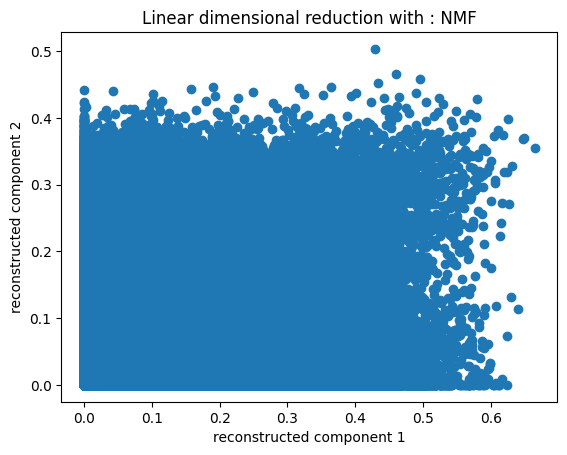

In [25]:
plt.scatter(W[:,0], W[:,1])
plt.title("Linear dimensional reduction with : NMF")
plt.xlabel("reconstructed component 1")
plt.ylabel("reconstructed component 2")
plt.show()

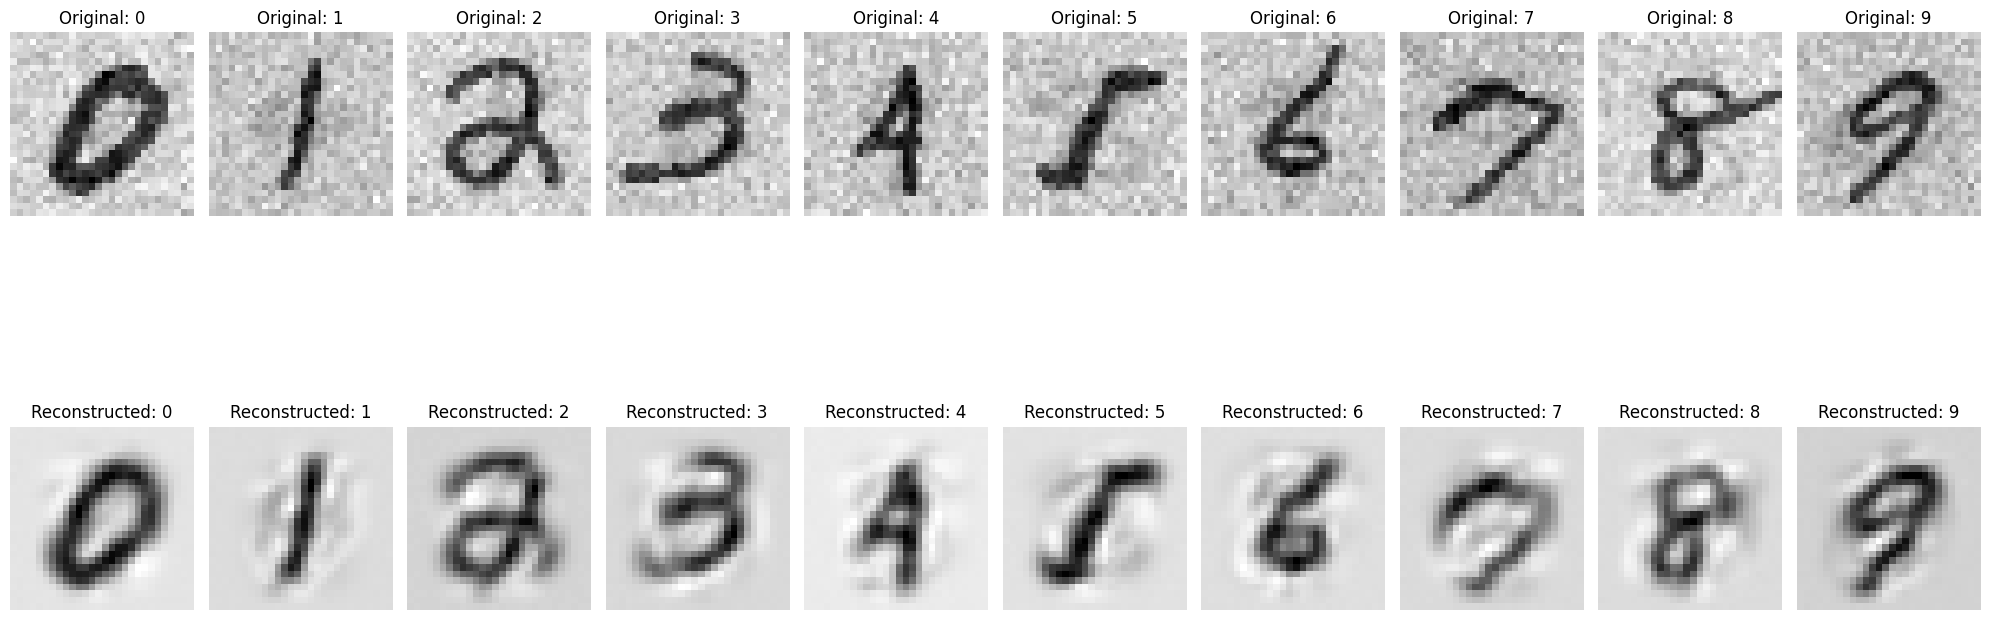

In [25]:
# Display the images
display_images(labels, data, reconstructed_data_nmf)

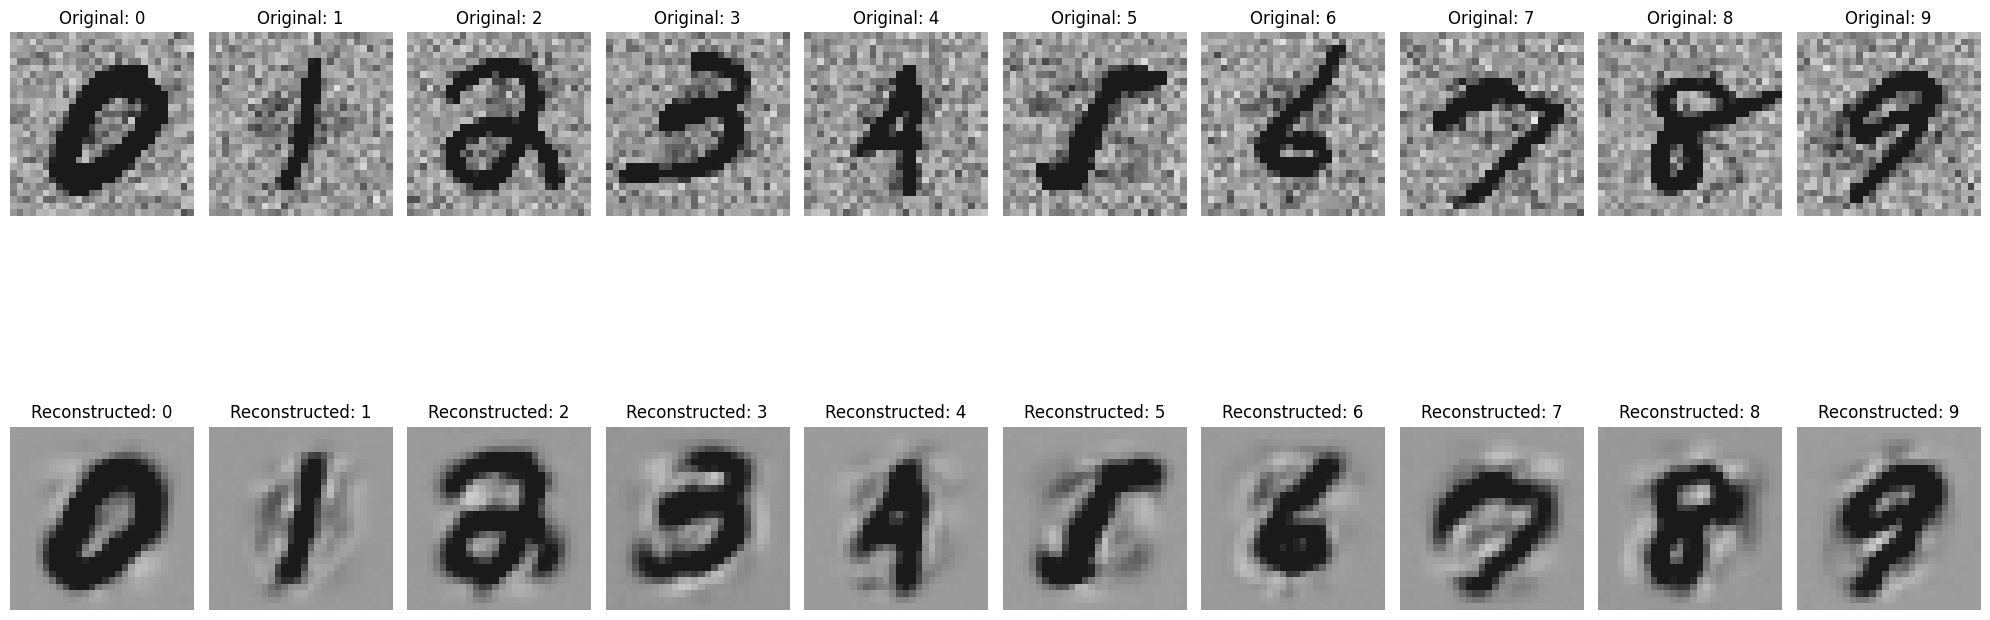

In [113]:
display_images(labels, data, reconstructed_data_nmf)

In [ ]:
nmf_model = NMF(n_components=2, init='random', solver='mu', max_iter=10000)

# Fit the model to the entire data
W = nmf_model.fit_transform(data)



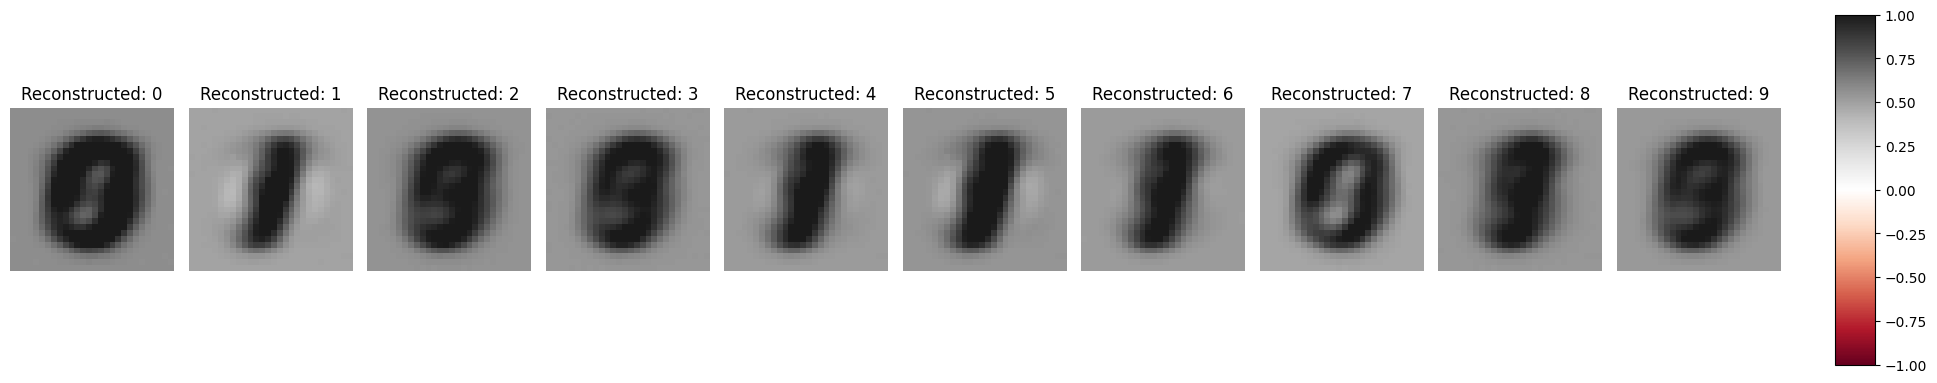

In [142]:
reconstructed_data_nmf_2 = nmf_model.inverse_transform(W)
display_images(labels, reconstructed_data_nmf_2)

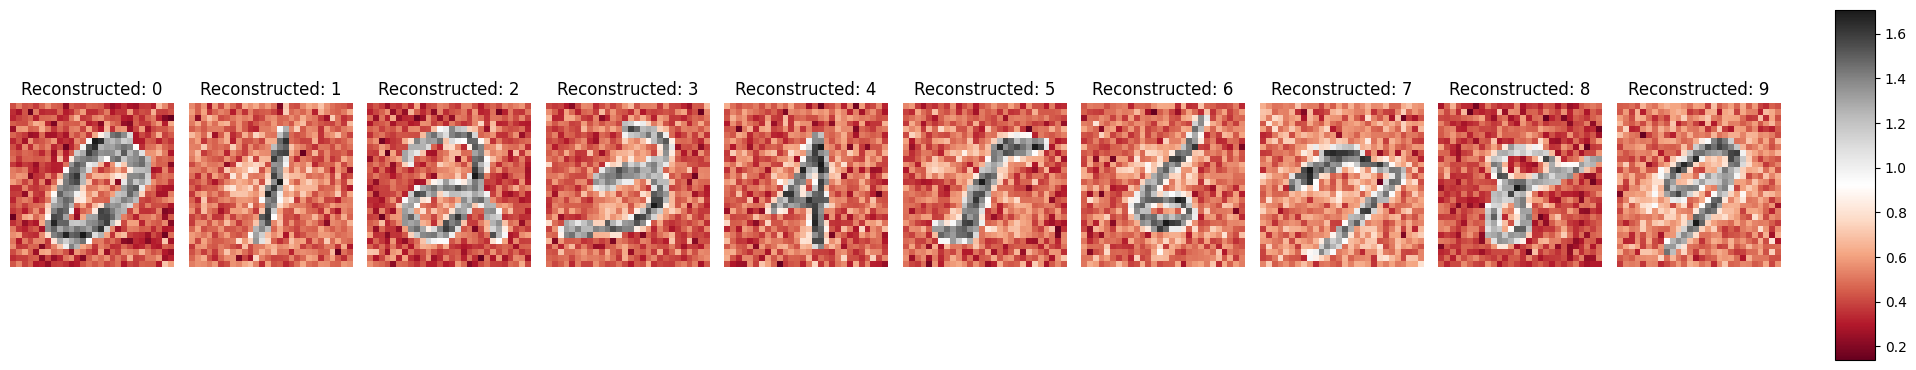

In [156]:
display_images(labels, data)

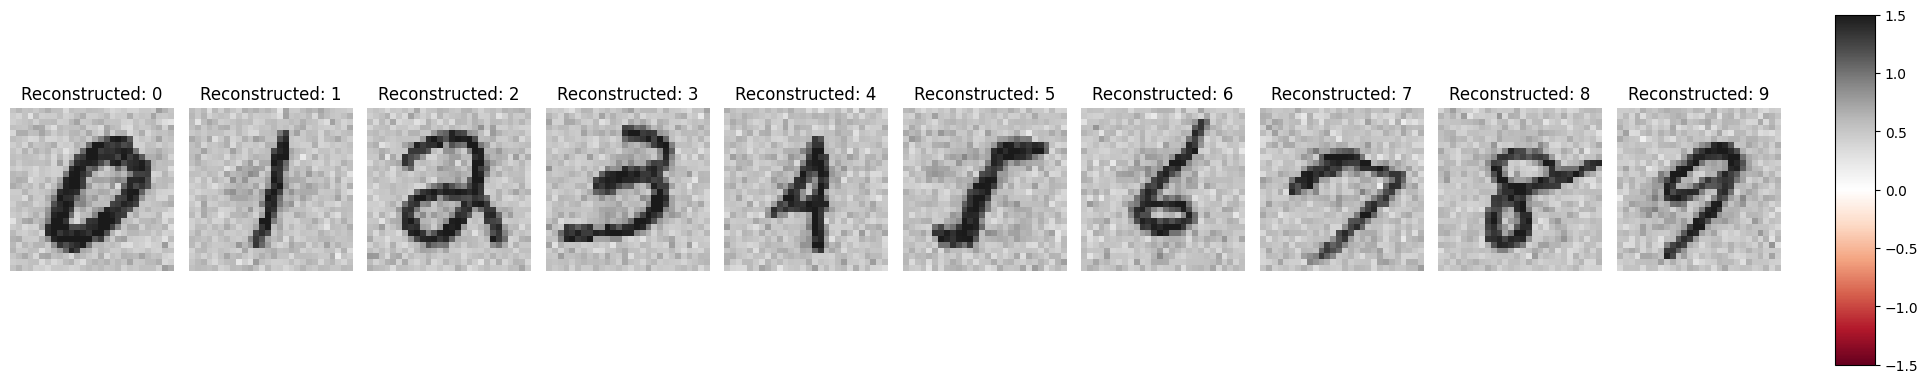

In [162]:
display_images(labels, data)

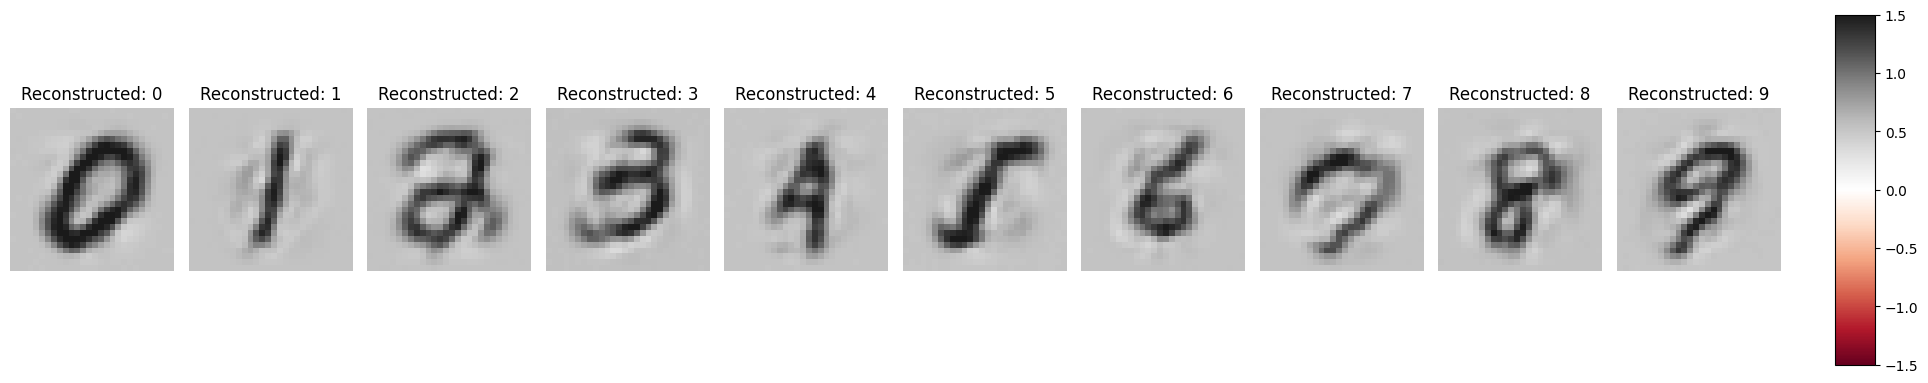

In [163]:
display_images(labels, reconstructed_data_nmf)

In [129]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)

# Randomly sample a subset of the data
sample_size = 5000  # Define the sample size
X_sample, _, y_sample, _ = train_test_split(X_standardized, labels, train_size=sample_size, stratify=labels, random_state=42)

# Set up a pipeline with KernelPCA and an SVM classifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

# Define the parameter grid
param_grid = {
    'pca__n_components': [2,10,20,50,100],
    'svc__C': [1, 10]  # Example C values for SVM
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_sample, y_sample)

# Best number of components
best_n_components = grid_search.best_params_['pca__n_components']
print(f"Best number of components: {best_n_components}")

# You can also print other best parameters if needed
print("Best parameters:", grid_search.best_params_)

Best number of components: 50
Best parameters: {'pca__n_components': 50, 'svc__C': 10}


In [28]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(X_scaled)

In [156]:
pca = PCA(n_components=2)
data_pca_classification = pca.fit_transform(X_scaled)

In [116]:
reconstructed_data_pca = pca.inverse_transform(data_pca)
reconstructed_data_pca_scal = scaler.inverse_transform(reconstructed_data_pca)

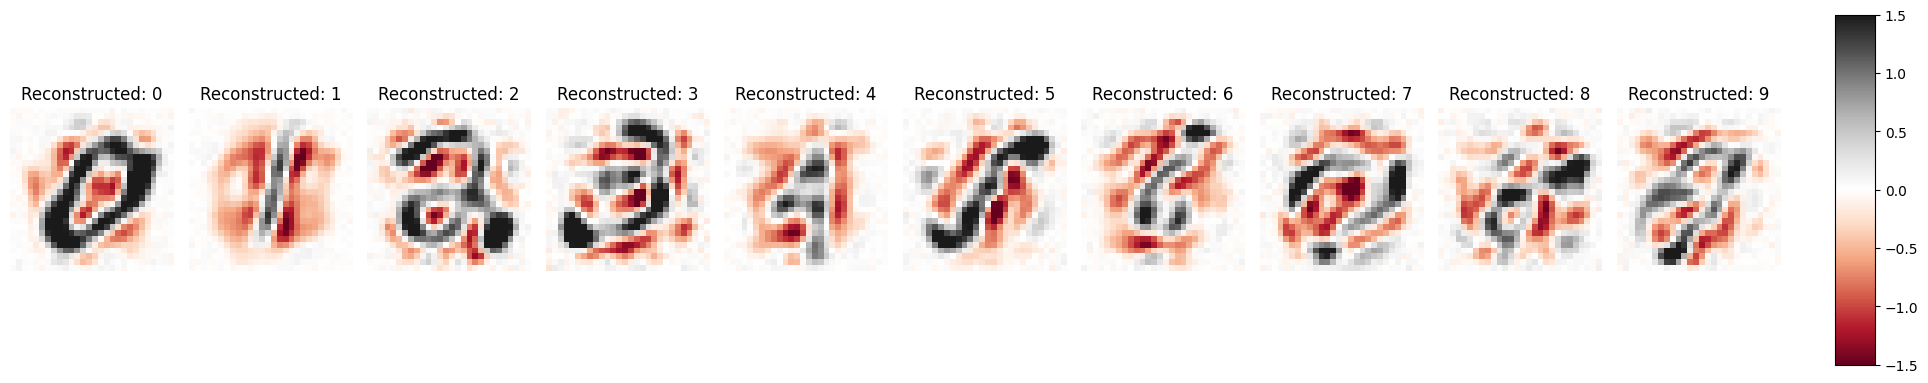

In [164]:
display_images(labels,reconstructed_data_pca)

## Non-linear dimension reduction

In [130]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)

# Randomly sample a subset of the data
sample_size = 5000  # Define the sample size
X_sample, _, y_sample, _ = train_test_split(X_standardized, labels, train_size=sample_size, stratify=labels, random_state=42)

# Set up a pipeline with KernelPCA and an SVM classifier
pipeline = Pipeline([
    ('kpca', KernelPCA(kernel='rbf', fit_inverse_transform=True)),
    ('svc', SVC())
])

# Define the parameter grid
param_grid = {
    'kpca__n_components': [2,10,20,50,100],
    'svc__C': [1, 10]  # Example C values for SVM
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_sample, y_sample)

# Best number of components
best_n_components = grid_search.best_params_['kpca__n_components']
print(f"Best number of components: {best_n_components}")

# You can also print other best parameters if needed
print("Best parameters:", grid_search.best_params_)

Best number of components: 50
Best parameters: {'kpca__n_components': 50, 'svc__C': 10}


In [33]:
# kernelPCA with sampling and averaging
# Define parameters
num_samples = 10000  # Number of samples for each run
num_components = 60  # Number of components in KernelPCA
num_runs = 5  # Number of runs for averaging

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

reconstructed_data_kpca = np.zeros_like(data)
X_kpca = np.zeros((50000,num_components))


for run in tqdm(range(num_runs)):

    # Step 1: Random Sampling
    indices = np.random.choice(X_scaled.shape[0], num_samples, replace=False)
    sampled_data = X_scaled[indices]

    # Step 2: KernelPCA
    kpca = KernelPCA(n_components=num_components, kernel='rbf', fit_inverse_transform=True)
    sampled_data_reduced = kpca.fit_transform(sampled_data)

    # Step 3: Transform the Entire Dataset
    data_reduced = kpca.transform(X_scaled)
    X_kpca += data_reduced
    # Step 4: Perform the inverse transformation
    data_reconstructed = kpca.inverse_transform(data_reduced)
    

    # Accumulate reconstructed images
    reconstructed_data_kpca += data_reconstructed

# Step 5: Averaging the results
reconstructed_data_kpca /= num_runs
X_kpca/=num_runs


100%|██████████| 5/5 [20:18<00:00, 243.66s/it]


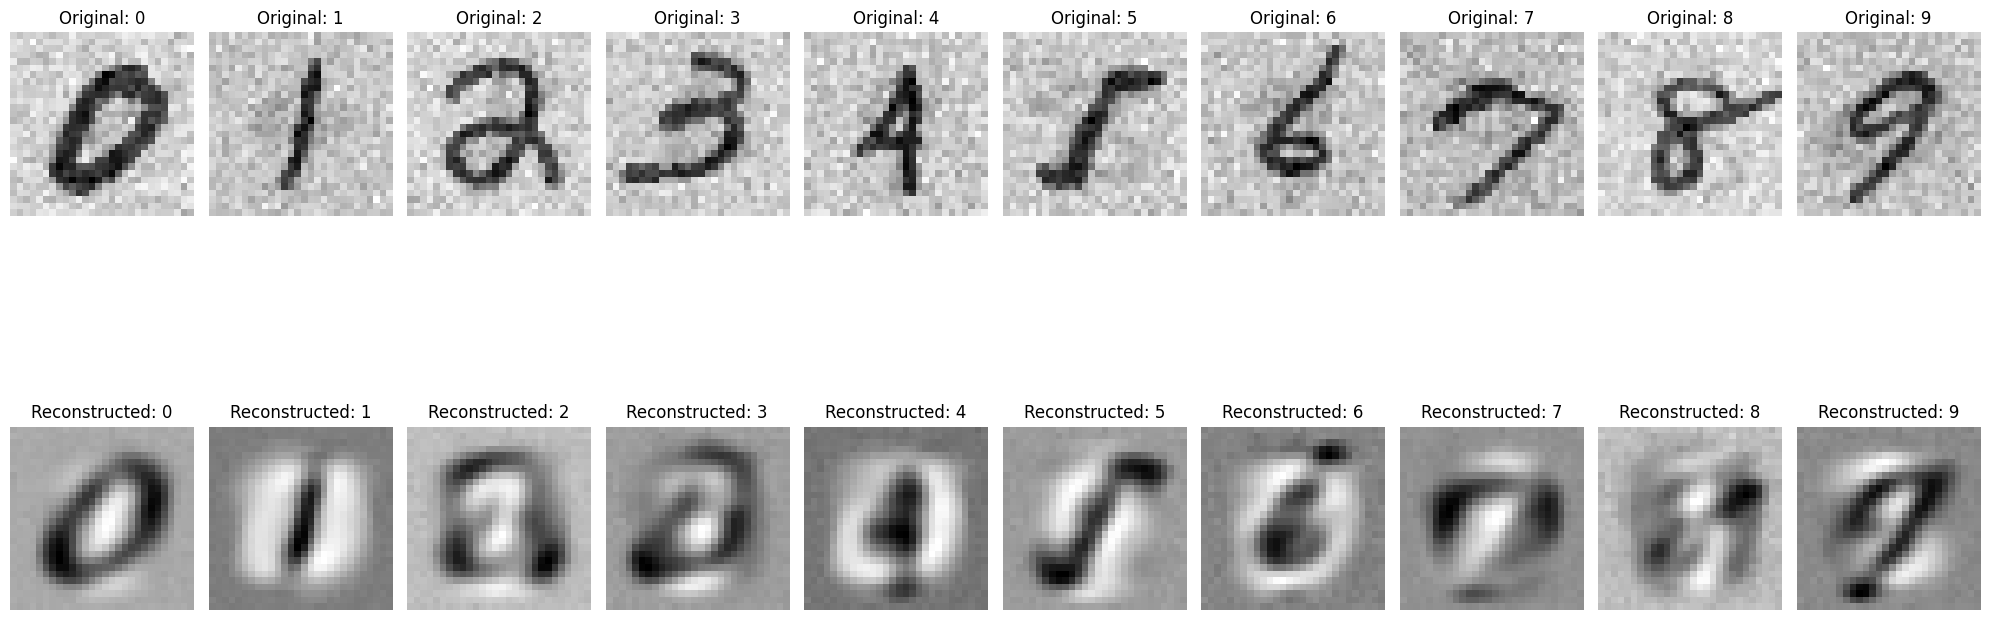

In [34]:
# without scaler inverse_transform
display_images(labels,data, reconstructed_data_kpca)

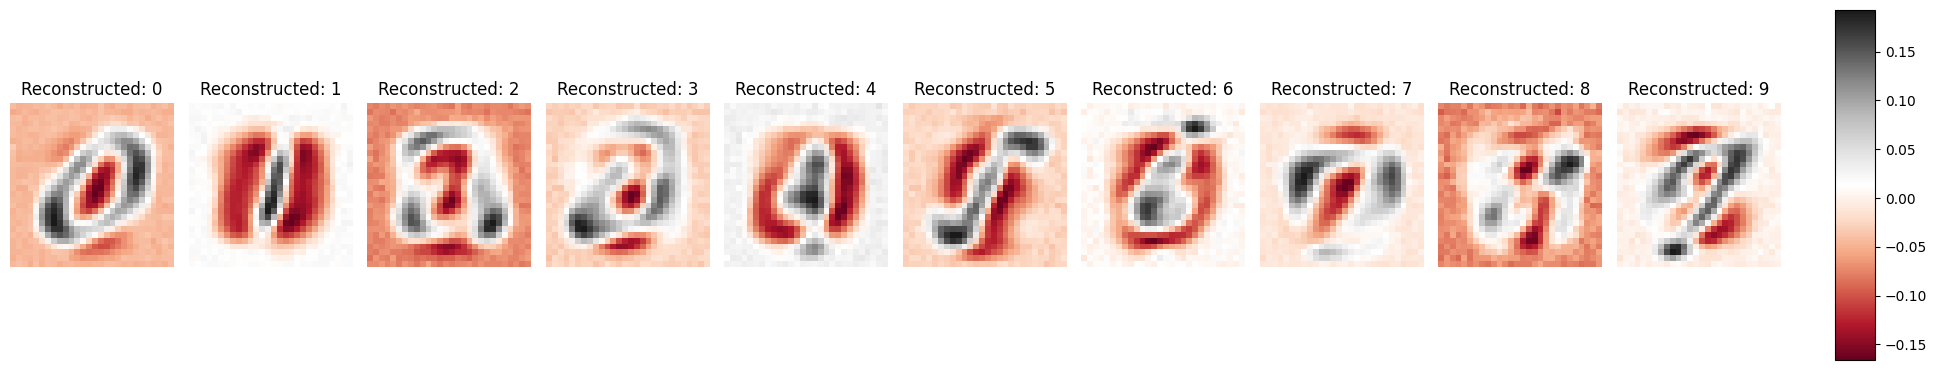

In [172]:
# with scaler inverse_transform
display_images(labels,reconstructed_data_kpca)

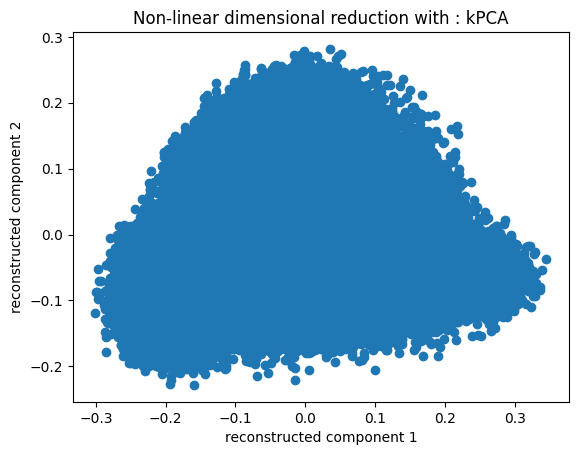

In [ ]:
plt.scatter(X_kpca[:,0], X_kpca[:,1])
plt.title("Non-linear dimensional reduction with : kPCA")
plt.xlabel("reconstructed component 1")
plt.ylabel("reconstructed component 2")
plt.show()


In [30]:
X_kpca

array([[-0.01229268, -0.18176582, -0.08942339, ...,  0.01056594,
         0.01277754, -0.00365366],
       [ 0.13922616, -0.05490581,  0.02208971, ...,  0.00193914,
         0.00709607,  0.00574927],
       [ 0.06205188, -0.00455634, -0.0536033 , ...,  0.01206903,
        -0.00895432,  0.01995825],
       ...,
       [-0.21941905, -0.10333632, -0.02324316, ...,  0.00280376,
         0.0105164 , -0.00092987],
       [-0.02258871, -0.04732748,  0.14216054, ..., -0.00642664,
         0.00725403, -0.00511237],
       [ 0.00468969, -0.03899163, -0.0234196 , ...,  0.02395391,
         0.01638504,  0.01721995]])

# Classification performance

In [17]:
# Split the dataset into training and testing sets

X_train_full, X_test, y_train_full, y_test = train_test_split(X_kpca, labels, test_size=0.2, random_state=42)

In [31]:
# Define a function to perform grid search and return the best estimator
def perform_grid_search(clf, param_grid, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {clf.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [40]:


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'format': '%d'})
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    # Ensure all cells including zero values are annotated
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j + 0.5, i + 0.5, cm[i, j], 
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black')

    plt.show()

In [44]:
def subsample_once(X, y, sample_size):
    indices = np.random.choice(len(X), sample_size, replace=True)
    return X[indices], y[indices]

In [45]:
# Define a function to train and evaluate the model with batching
def evaluate_model(classifiers, sample_sizes, batch_size=128):
    results = {name: [] for name in classifiers.keys()}
    
    for size in sample_sizes:
        print(f"---------Training size : {size} -----------")
        # Take a subset of the training data
        X_train, X_test, y_train, y_test = train_test_split(X_kpca, labels, train_size=size, random_state=42)
        
        for name, clf in tqdm(classifiers.items()):
            print(f"Classifer : {name}")
            
            if name == "RandomForestClassifier":
                # Subsampling for RandomForestClassifier
                sample_size = 10000
                X_subsample, y_subsample = subsample_once(X_train, y_train, sample_size)
                clf.fit(X_subsample, y_subsample)
                y_pred = clf.predict(X_test)
            elif hasattr(clf, "partial_fit"):
                # Mini-batch training with the classifier
                X_train, y_train = shuffle(X_train, y_train, random_state=42)
                for i in range(0, len(X_train), batch_size):
                    end = i + batch_size
                    clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(labels))
                y_pred = clf.predict(X_test)
            
            else:
                # Train the model with the entire subset
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
            
            # Evaluate the model
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results[name].append(accuracy)
            
            plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix: {name} (Training size: {size})")
            print(f"Classifier: {name}, Training size: {size}, Accuracy: {accuracy}")
            print("\n")
    
    return results

---------Training size : 0.05 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier


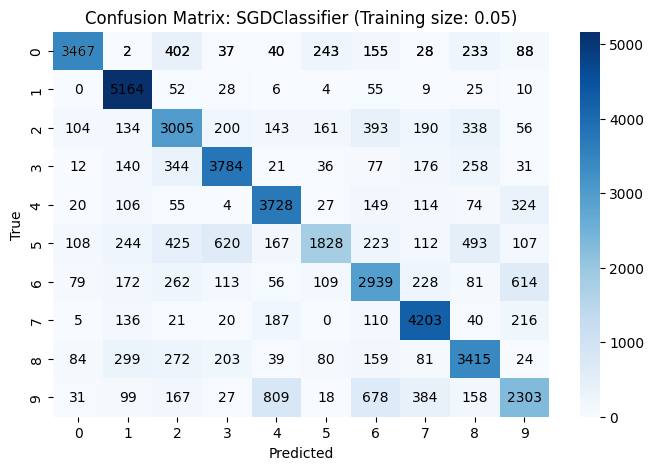

 20%|██        | 1/5 [00:00<00:03,  1.14it/s]

Classifier: SGDClassifier, Training size: 0.05, Accuracy: 0.7123368421052632


Classifer : MLPClassifier


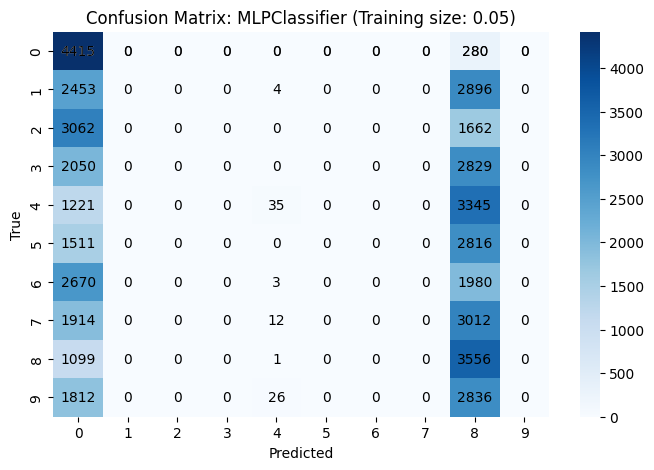

 40%|████      | 2/5 [00:01<00:02,  1.20it/s]

Classifier: MLPClassifier, Training size: 0.05, Accuracy: 0.16854736842105264


Classifer : SVC


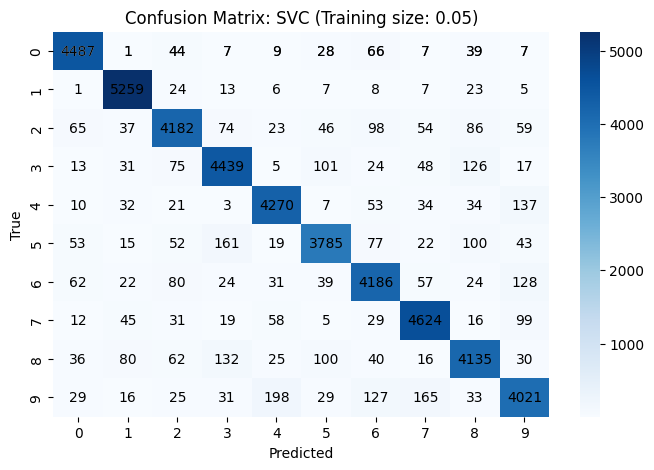

 60%|██████    | 3/5 [00:47<00:43, 21.50s/it]

Classifier: SVC, Training size: 0.05, Accuracy: 0.9134315789473684


Classifer : KNeighborsClassifier


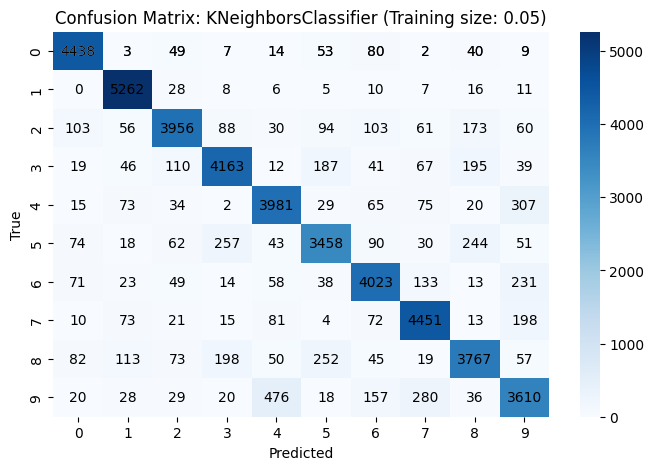

 80%|████████  | 4/5 [00:49<00:13, 13.86s/it]

Classifier: KNeighborsClassifier, Training size: 0.05, Accuracy: 0.8654526315789474


Classifer : RandomForestClassifier


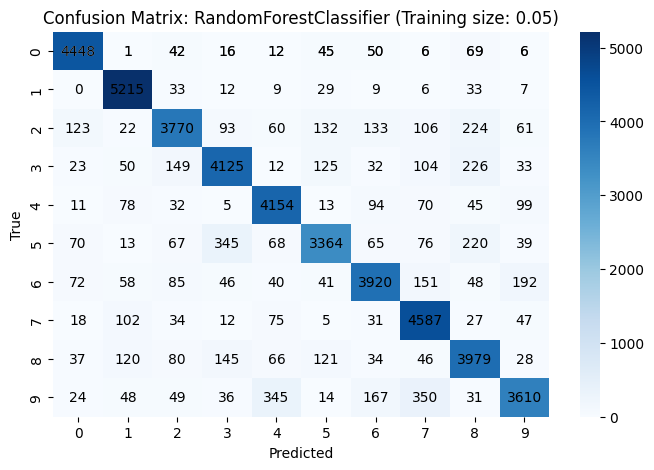

100%|██████████| 5/5 [03:12<00:00, 38.51s/it]


Classifier: RandomForestClassifier, Training size: 0.05, Accuracy: 0.8667789473684211


---------Training size : 0.1 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier


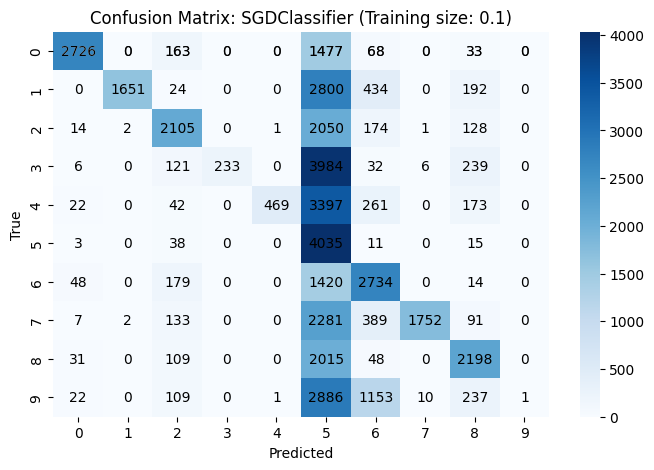

 20%|██        | 1/5 [00:01<00:06,  1.57s/it]

Classifier: SGDClassifier, Training size: 0.1, Accuracy: 0.39786666666666665


Classifer : MLPClassifier


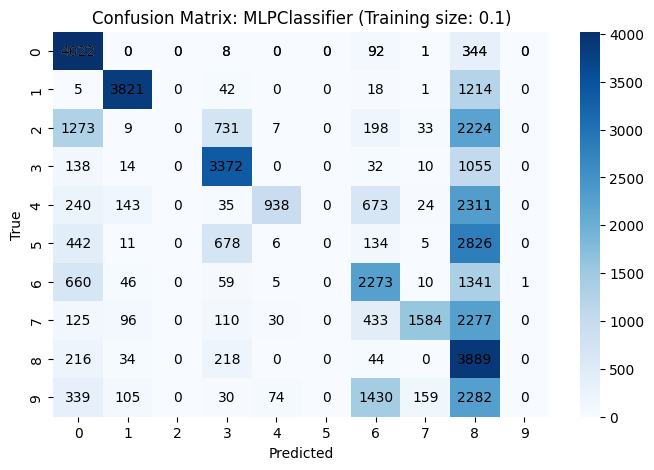

 40%|████      | 2/5 [00:02<00:04,  1.46s/it]

Classifier: MLPClassifier, Training size: 0.1, Accuracy: 0.4422


Classifer : SVC


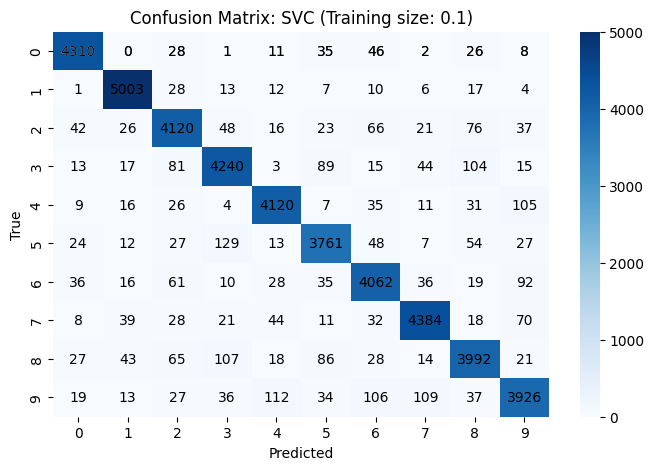

 60%|██████    | 3/5 [01:16<01:08, 34.39s/it]

Classifier: SVC, Training size: 0.1, Accuracy: 0.9315111111111111


Classifer : KNeighborsClassifier


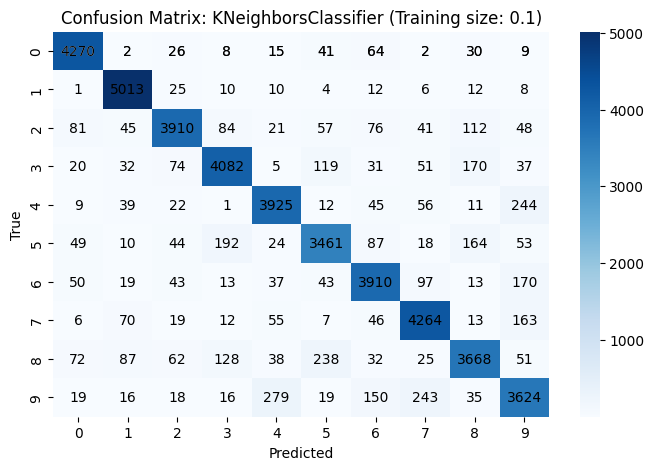

 80%|████████  | 4/5 [01:19<00:21, 21.94s/it]

Classifier: KNeighborsClassifier, Training size: 0.1, Accuracy: 0.8917111111111111


Classifer : RandomForestClassifier


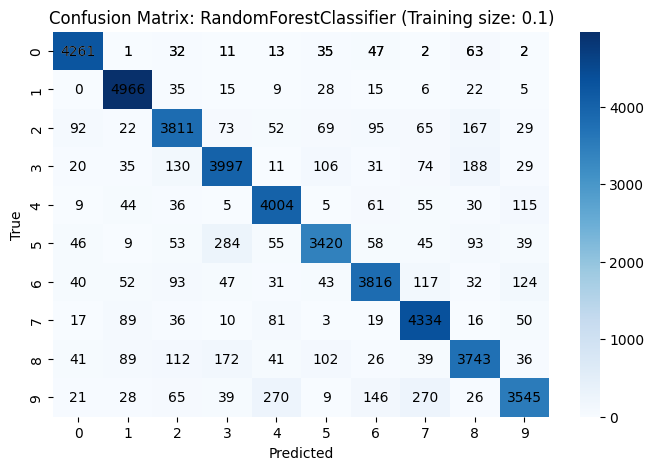

100%|██████████| 5/5 [04:27<00:00, 53.51s/it]


Classifier: RandomForestClassifier, Training size: 0.1, Accuracy: 0.8866


---------Training size : 0.2 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier


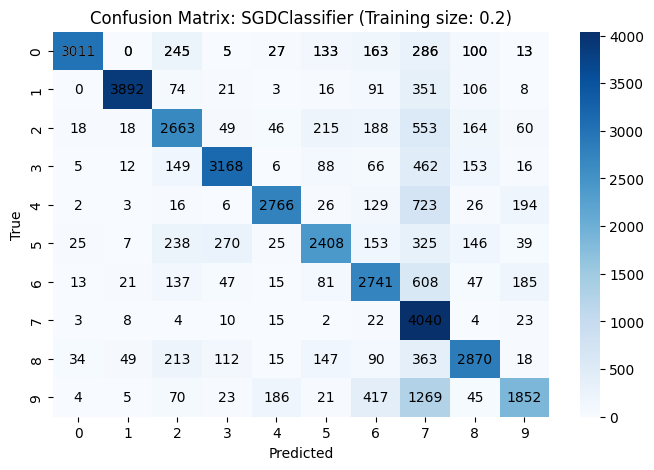

 20%|██        | 1/5 [00:01<00:07,  1.94s/it]

Classifier: SGDClassifier, Training size: 0.2, Accuracy: 0.735275


Classifer : MLPClassifier


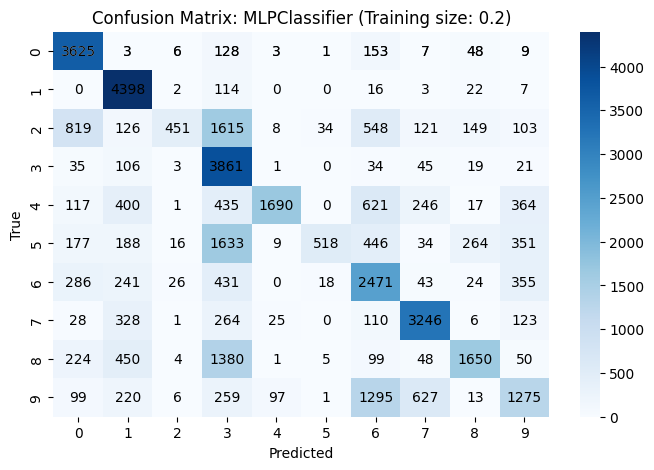

 40%|████      | 2/5 [00:03<00:04,  1.46s/it]

Classifier: MLPClassifier, Training size: 0.2, Accuracy: 0.579625


Classifer : SVC


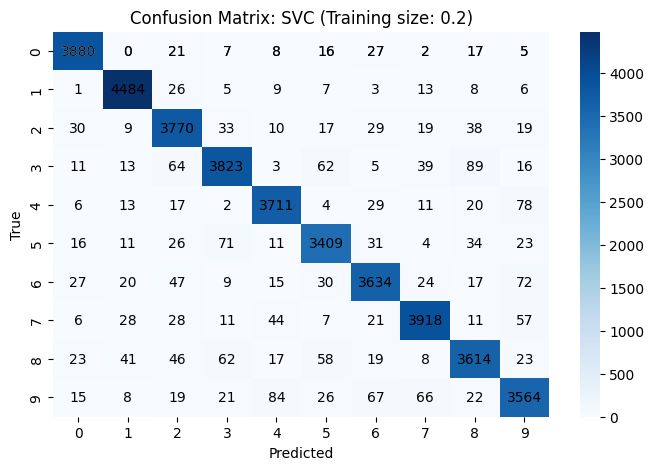

 60%|██████    | 3/5 [01:47<01:36, 48.37s/it]

Classifier: SVC, Training size: 0.2, Accuracy: 0.945175


Classifer : KNeighborsClassifier


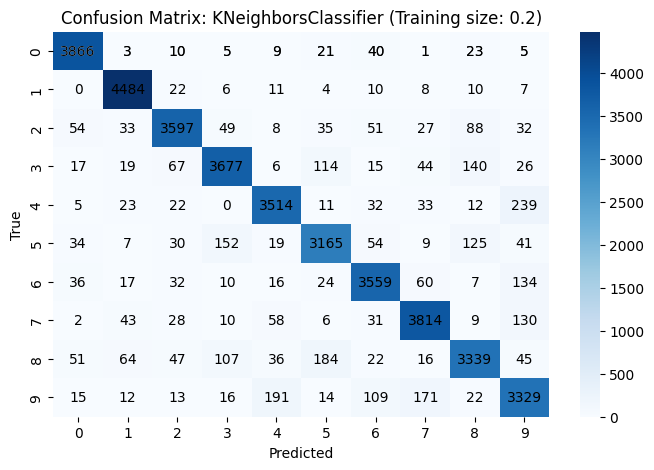

 80%|████████  | 4/5 [01:50<00:30, 30.74s/it]

Classifier: KNeighborsClassifier, Training size: 0.2, Accuracy: 0.9086


Classifer : RandomForestClassifier


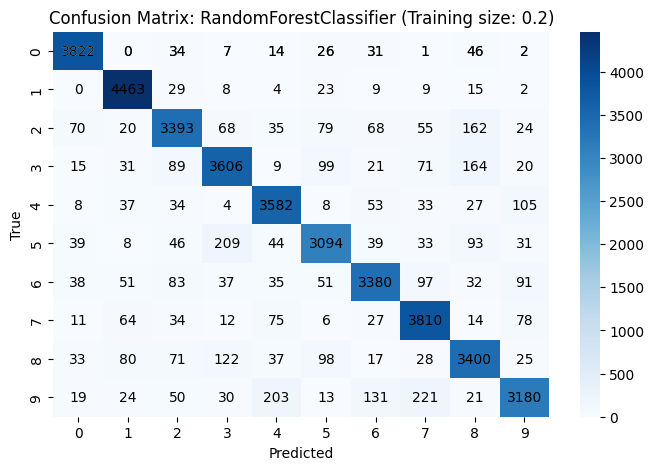

100%|██████████| 5/5 [05:39<00:00, 67.99s/it] 


Classifier: RandomForestClassifier, Training size: 0.2, Accuracy: 0.89325


---------Training size : 0.4 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier


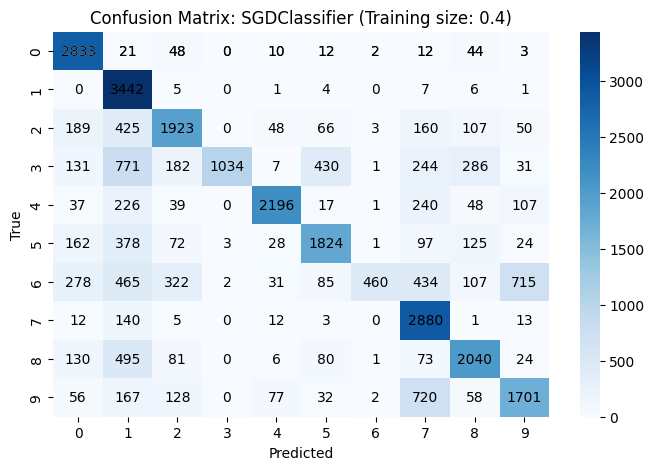

 20%|██        | 1/5 [00:01<00:07,  1.88s/it]

Classifier: SGDClassifier, Training size: 0.4, Accuracy: 0.6777666666666666


Classifer : MLPClassifier


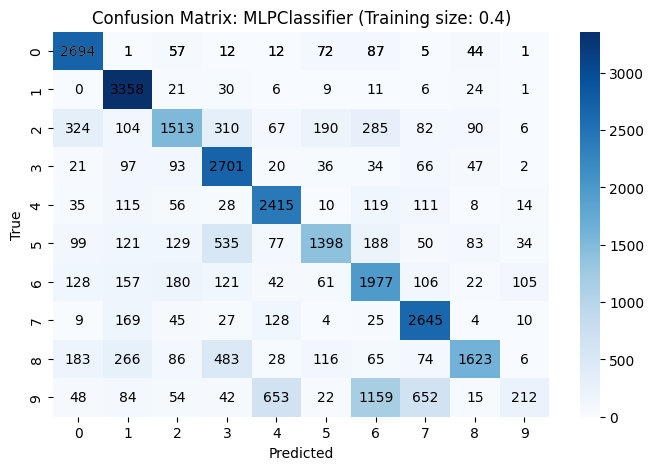

 40%|████      | 2/5 [00:03<00:05,  1.72s/it]

Classifier: MLPClassifier, Training size: 0.4, Accuracy: 0.6845333333333333


Classifer : SVC


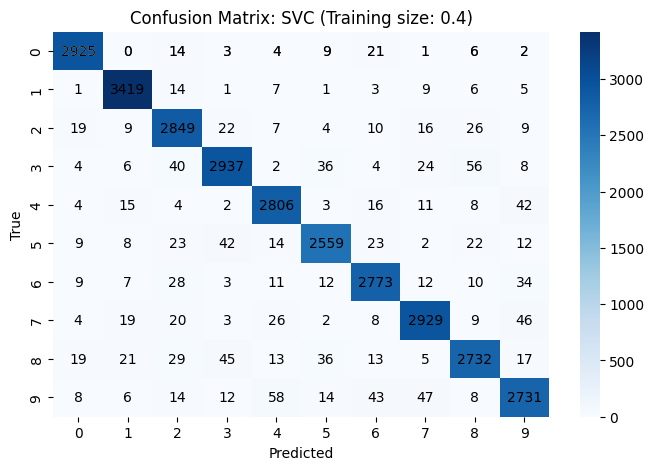

 60%|██████    | 3/5 [02:03<01:51, 55.86s/it]

Classifier: SVC, Training size: 0.4, Accuracy: 0.9553333333333334


Classifer : KNeighborsClassifier


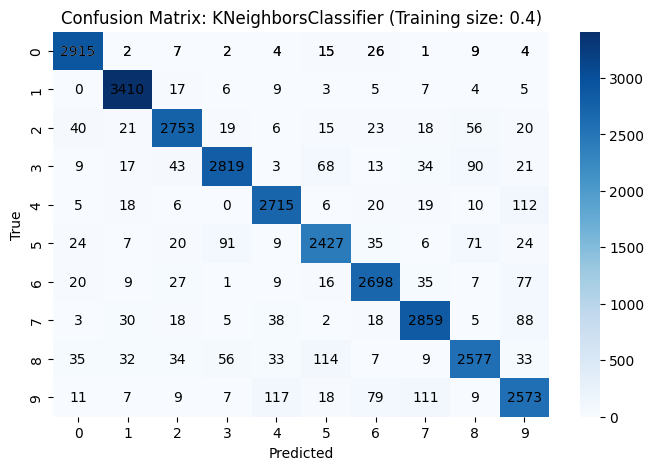

 80%|████████  | 4/5 [02:09<00:35, 35.88s/it]

Classifier: KNeighborsClassifier, Training size: 0.4, Accuracy: 0.9248666666666666


Classifer : RandomForestClassifier


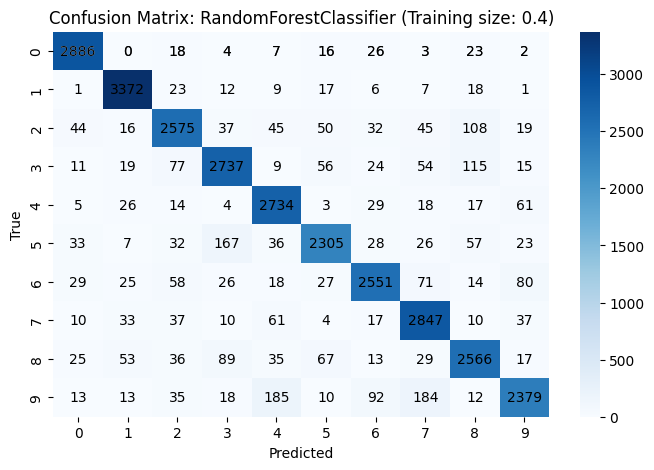

100%|██████████| 5/5 [06:22<00:00, 76.41s/it] 


Classifier: RandomForestClassifier, Training size: 0.4, Accuracy: 0.8984


---------Training size : 0.8 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier


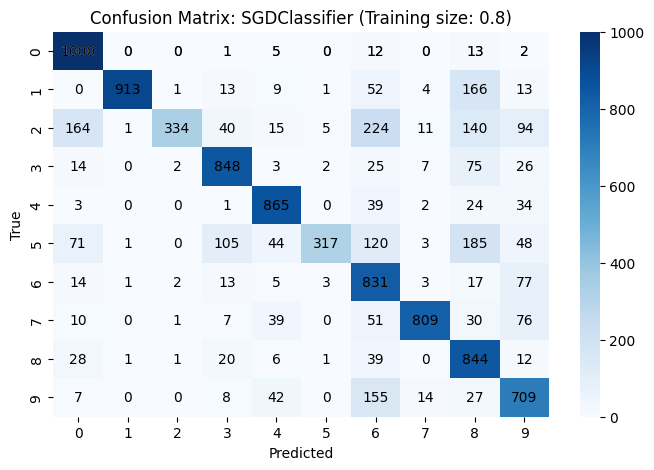

 20%|██        | 1/5 [00:03<00:12,  3.14s/it]

Classifier: SGDClassifier, Training size: 0.8, Accuracy: 0.747


Classifer : MLPClassifier


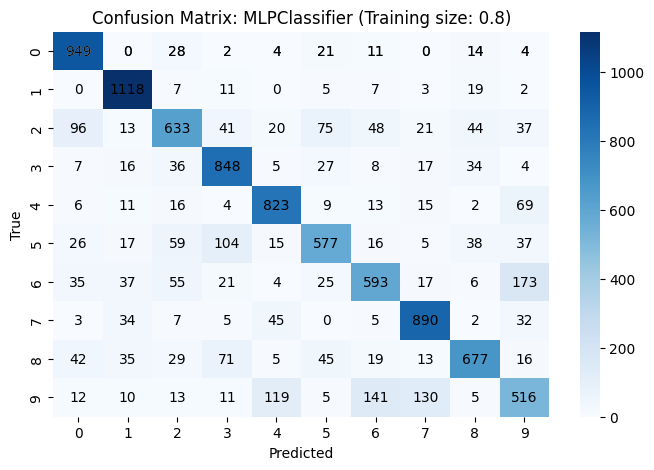

 40%|████      | 2/5 [00:05<00:08,  2.68s/it]

Classifier: MLPClassifier, Training size: 0.8, Accuracy: 0.7624


Classifer : SVC


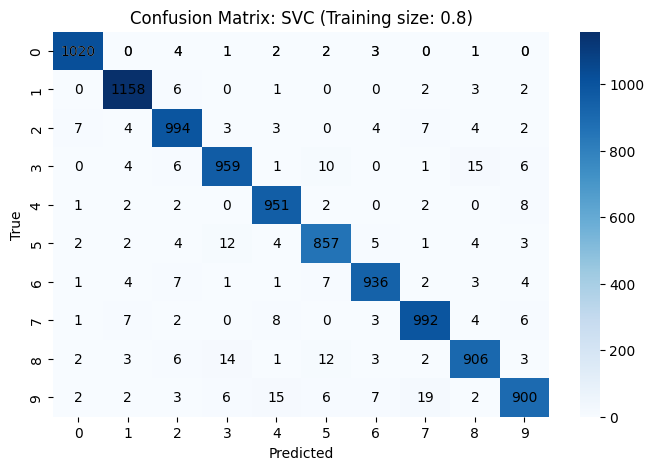

 60%|██████    | 3/5 [01:36<01:26, 43.15s/it]

Classifier: SVC, Training size: 0.8, Accuracy: 0.9673


Classifer : KNeighborsClassifier


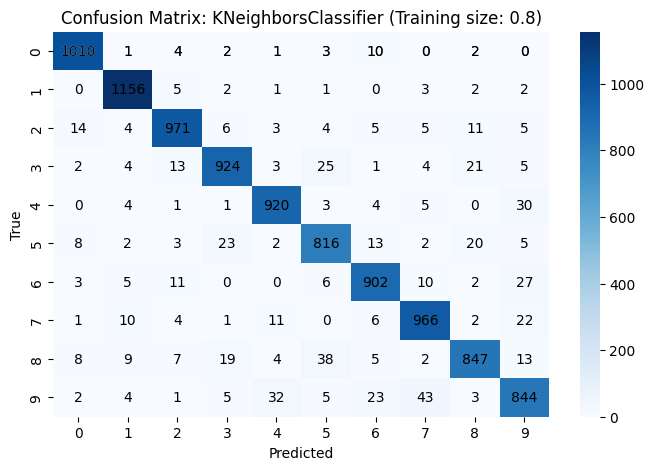

 80%|████████  | 4/5 [01:40<00:27, 27.51s/it]

Classifier: KNeighborsClassifier, Training size: 0.8, Accuracy: 0.9356


Classifer : RandomForestClassifier


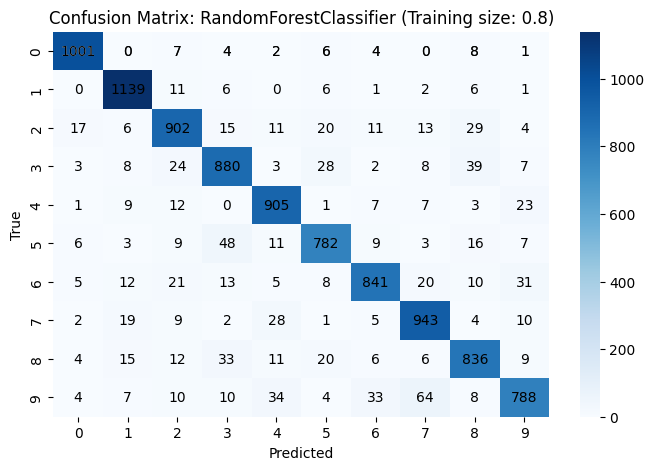

100%|██████████| 5/5 [05:50<00:00, 70.17s/it] 

Classifier: RandomForestClassifier, Training size: 0.8, Accuracy: 0.9017




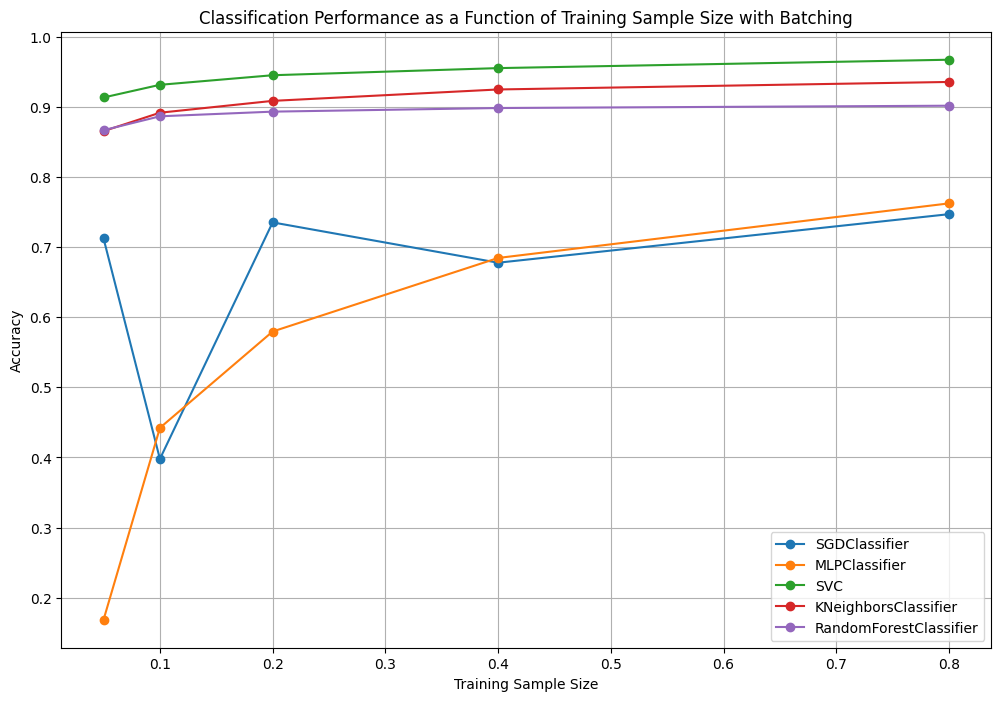

In [46]:
classifiers = {
    "SGDClassifier": SGDClassifier(max_iter=10000, tol=1e-3, loss ='perceptron'),
    "MLPClassifier": MLPClassifier(max_iter=10000,hidden_layer_sizes=(100,)),
    "SVC": SVC(kernel = 'rbf',C=10),
    "KNeighborsClassifier": KNeighborsClassifier(weights='distance', n_neighbors=5),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=1000)
}
# Define the sample sizes to evaluate
sample_sizes = [0.05,0.1,0.2,0.4,0.8]

# Evaluate the models
results = evaluate_model(classifiers, sample_sizes)

# Plot the results
plt.figure(figsize=(12, 8))
for name, accuracies in results.items():
    plt.plot(sample_sizes, accuracies, marker='o', label=name)
plt.xlabel("Training Sample Size")
plt.ylabel("Accuracy")
plt.title("Classification Performance as a Function of Training Sample Size with Batching")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
classifiers = {
    "SGDClassifier": SGDClassifier(max_iter=10000, tol=1e-3, loss ='perceptron'),
    "MLPClassifier": MLPClassifier(max_iter=10000,hidden_layer_sizes=(100,)),
    "SVC": SVC(kernel = 'rbf',C=10),
    "KNeighborsClassifier": KNeighborsClassifier(weights='distance', n_neighbors=5),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=5000)
}

# Define the parameter grids for each classifier
param_grids = {
    "SGDClassifier": {
        'alpha': [1e-4,1e-3, 1e-2]
    },
    "MLPClassifier": {
        'alpha': [1e-3, 1e-2]
    },
    "SVC": {
    },
    "KNeighborsClassifier": {
        'n_neighbors': [ 5, 10,100,500,1000,5000],
    },
    "RandomForestClassifier": {
        
    }
}

In [56]:
# # Define the sample sizes to evaluate
# sample_sizes = [0.05,0.1,0.2,0.4,0.8]

# # Evaluate the models
# results = evaluate_model(classifiers, param_grids, sample_sizes)

# # Plot the results
# plt.figure(figsize=(12, 8))
# for name, accuracies in results.items():
#     plt.plot(sample_sizes, accuracies, marker='o', label=name)
# plt.xlabel("Training Sample Size")
# plt.ylabel("Accuracy")
# plt.title("Classification Performance as a Function of Training Sample Size with Grid Search and Batching")
# plt.legend()
# plt.grid(True)
# plt.show()

---------Training size : 0.05 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGDClassifier: {'alpha': 0.01}


 20%|██        | 1/5 [00:08<00:33,  8.43s/it]

Classifier: SGDClassifier, Training size: 0.05, Accuracy: 0.6846526315789474


Classifer : MLPClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for MLPClassifier: {'alpha': 0.01}


 40%|████      | 2/5 [02:21<04:04, 81.63s/it]

Classifier: MLPClassifier, Training size: 0.05, Accuracy: 0.8821052631578947


Classifer : SVC
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for SVC: {}


 60%|██████    | 3/5 [02:46<01:52, 56.04s/it]

Classifier: SVC, Training size: 0.05, Accuracy: 0.9101473684210526


Classifer : KNeighborsClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


Best parameters for KNeighborsClassifier: {'n_neighbors': 10}


 80%|████████  | 4/5 [02:50<00:35, 35.39s/it]

Classifier: KNeighborsClassifier, Training size: 0.05, Accuracy: 0.8610947368421052


Classifer : RandomForestClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for RandomForestClassifier: {'n_estimators': 5000}


100%|██████████| 5/5 [17:07<00:00, 205.56s/it]

Classifier: RandomForestClassifier, Training size: 0.05, Accuracy: 0.8671368421052632


---------Training size : 0.1 -----------



  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGDClassifier: {'alpha': 0.0001}


 20%|██        | 1/5 [00:20<01:20, 20.23s/it]

Classifier: SGDClassifier, Training size: 0.1, Accuracy: 0.7838888888888889


Classifer : MLPClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for MLPClassifier: {'alpha': 0.01}


 40%|████      | 2/5 [04:52<08:26, 168.74s/it]

Classifier: MLPClassifier, Training size: 0.1, Accuracy: 0.9093555555555556


Classifer : SVC
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for SVC: {}


 60%|██████    | 3/5 [05:30<03:37, 109.00s/it]

Classifier: SVC, Training size: 0.1, Accuracy: 0.9304666666666667


Classifer : KNeighborsClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


Best parameters for KNeighborsClassifier: {'n_neighbors': 5}


 80%|████████  | 4/5 [05:35<01:07, 67.93s/it] 

Classifier: KNeighborsClassifier, Training size: 0.1, Accuracy: 0.8897555555555555


Classifer : RandomForestClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for RandomForestClassifier: {'n_estimators': 5000}


100%|██████████| 5/5 [34:47<00:00, 417.45s/it]

Classifier: RandomForestClassifier, Training size: 0.1, Accuracy: 0.8906222222222222


---------Training size : 0.2 -----------



  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGDClassifier: {'alpha': 0.0001}


 20%|██        | 1/5 [00:30<02:03, 30.82s/it]

Classifier: SGDClassifier, Training size: 0.2, Accuracy: 0.684525


Classifer : MLPClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for MLPClassifier: {'alpha': 0.001}


 40%|████      | 2/5 [09:38<16:44, 334.70s/it]

Classifier: MLPClassifier, Training size: 0.2, Accuracy: 0.929775


Classifer : SVC
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for SVC: {}


 60%|██████    | 3/5 [10:33<06:54, 207.06s/it]

Classifier: SVC, Training size: 0.2, Accuracy: 0.943175


Classifer : KNeighborsClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 5}


 80%|████████  | 4/5 [10:51<02:12, 132.41s/it]

Classifier: KNeighborsClassifier, Training size: 0.2, Accuracy: 0.907825


Classifer : RandomForestClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for RandomForestClassifier: {'n_estimators': 5000}


100%|██████████| 5/5 [1:12:25<00:00, 869.13s/it] 

Classifier: RandomForestClassifier, Training size: 0.2, Accuracy: 0.905375


---------Training size : 0.4 -----------



  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGDClassifier: {'alpha': 0.0001}


 20%|██        | 1/5 [00:54<03:37, 54.37s/it]

Classifier: SGDClassifier, Training size: 0.4, Accuracy: 0.6835333333333333


Classifer : MLPClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for MLPClassifier: {'alpha': 0.001}


 40%|████      | 2/5 [18:07<31:31, 630.40s/it]

Classifier: MLPClassifier, Training size: 0.4, Accuracy: 0.9456666666666667


Classifer : SVC
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for SVC: {}


 60%|██████    | 3/5 [19:39<12:48, 384.13s/it]

Classifier: SVC, Training size: 0.4, Accuracy: 0.9561666666666667


Classifer : KNeighborsClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 5}


 80%|████████  | 4/5 [20:16<04:07, 247.10s/it]

Classifier: KNeighborsClassifier, Training size: 0.4, Accuracy: 0.9217333333333333


Classifer : RandomForestClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for RandomForestClassifier: {'n_estimators': 5000}


100%|██████████| 5/5 [2:35:03<00:00, 1860.73s/it]

Classifier: RandomForestClassifier, Training size: 0.4, Accuracy: 0.9153


---------Training size : 0.8 -----------



  0%|          | 0/5 [00:00<?, ?it/s]

Classifer : SGDClassifier
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SGDClassifier: {'alpha': 0.001}


 20%|██        | 1/5 [01:42<06:48, 102.01s/it]

Classifier: SGDClassifier, Training size: 0.8, Accuracy: 0.757


Classifer : MLPClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters for MLPClassifier: {'alpha': 0.001}


 40%|████      | 2/5 [25:50<44:42, 894.04s/it]

Classifier: MLPClassifier, Training size: 0.8, Accuracy: 0.9536


Classifer : SVC
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for SVC: {}


 60%|██████    | 3/5 [28:22<18:30, 555.39s/it]

Classifier: SVC, Training size: 0.8, Accuracy: 0.9647


Classifer : KNeighborsClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 5}


 80%|████████  | 4/5 [30:02<06:15, 375.44s/it]

Classifier: KNeighborsClassifier, Training size: 0.8, Accuracy: 0.9354


Classifer : RandomForestClassifier
Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [37]:
def evaluate_model_dq(classifiers, param_grids, sample_sizes, batch_size=128, n_batches=5):
    results = {name: [] for name in classifiers.keys()}
    
    for size in sample_sizes:
        print(f"---------Training size: {size} -----------")
        # Take a subset of the training data
        X_train, X_test, y_train, y_test = train_test_split(X_kpca, labels, train_size=size, random_state=42)
        
        for name, clf in tqdm(classifiers.items()):
            print(f"Classifier: {name}")
            param_grid = param_grids[name]
            # Perform grid search to find the best parameters
            best_clf = perform_grid_search(clf, param_grid, X_train, y_train)
            
            # Check if classifier supports partial_fit
            if hasattr(best_clf, "partial_fit"):
                # Mini-batch training with the best estimator
                X_train, y_train = shuffle(X_train, y_train, random_state=42)
                for i in range(0, len(X_train), batch_size):
                    end = i + batch_size
                    best_clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(y))
            else:
                # Divide the data into n_batches
                skf = StratifiedKFold(n_splits=n_batches, shuffle=True, random_state=42)
                sub_models = []
                for train_index, _ in skf.split(X_train, y_train):
                    X_batch, y_batch = X_train[train_index], y_train[train_index]
                    sub_model = clone(best_clf)
                    sub_model.fit(X_batch, y_batch)
                    sub_models.append(sub_model)
                
                # Function to combine predictions
                def combined_predict(X):
                    predictions = np.array([model.predict(X) for model in sub_models])
                    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
                    return final_predictions

                # Make combined predictions
                y_pred = combined_predict(X_test)
            
            if not hasattr(best_clf, "partial_fit"):
                y_pred = combined_predict(X_test)
            else:
                y_pred = best_clf.predict(X_test)
            
            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            results[name].append(accuracy)
            
            print(f"Classifier: {name}, Training size: {size}, Accuracy: {accuracy}")
            plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix: {name} (Training size: {size})")
            print("\n")
    
    return results

In [ ]:
# Evaluate the models
classifiers_rf = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=1000)
}
sample_sizes_rf = [0.8]
results = evaluate_model_dq(classifiers_rf, param_grids, sample_sizes_rf)

In [133]:
def m_out_of_n_bootstrap(X, y, m):
    indices = np.random.choice(len(X), m, replace=True)
    return X[indices], y[indices]

---------Training size: 0.05 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifier: SGDClassifier
Classifier: SGDClassifier, Training size: 0.05, Accuracy: 0.7344631578947368


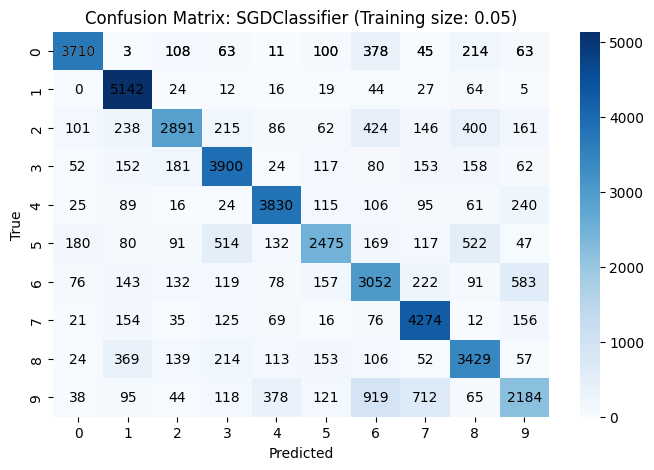

 20%|██        | 1/5 [00:00<00:02,  1.50it/s]



Classifier: MLPClassifier
Classifier: MLPClassifier, Training size: 0.05, Accuracy: 0.3351578947368421


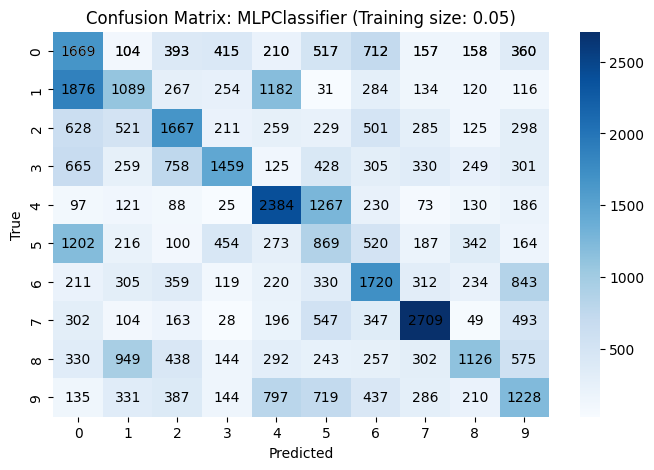

 40%|████      | 2/5 [00:01<00:02,  1.16it/s]



Classifier: SVC
Classifier: SVC, Training size: 0.05, Accuracy: 0.9266947368421052


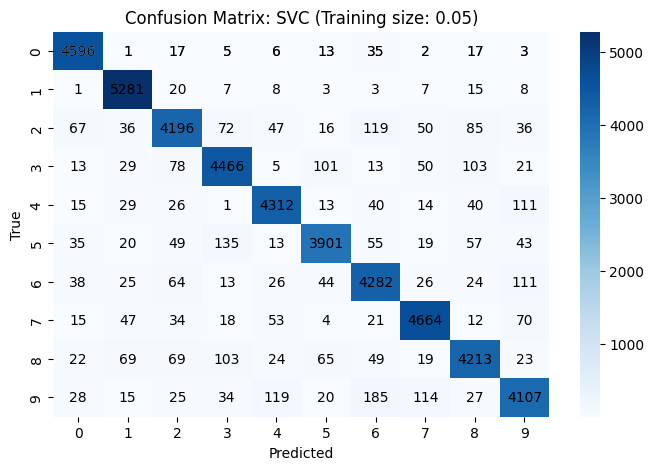

 60%|██████    | 3/5 [00:16<00:14,  7.41s/it]



Classifier: KNeighborsClassifier
Classifier: KNeighborsClassifier, Training size: 0.05, Accuracy: 0.895578947368421


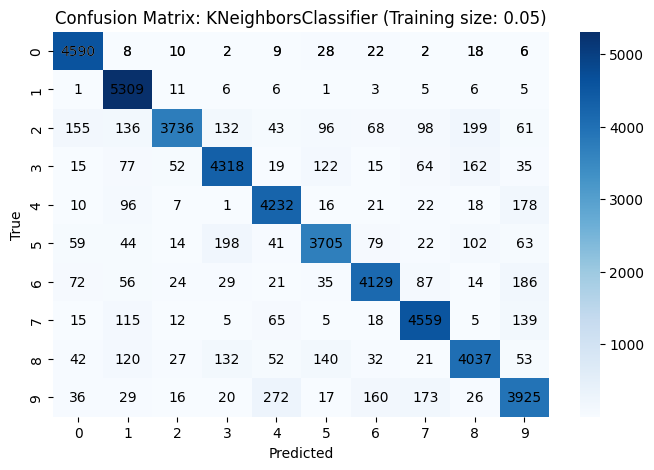

 80%|████████  | 4/5 [00:17<00:04,  4.92s/it]



Classifier: RandomForestClassifier
Classifier: RandomForestClassifier, Training size: 0.05, Accuracy: 0.5821263157894737


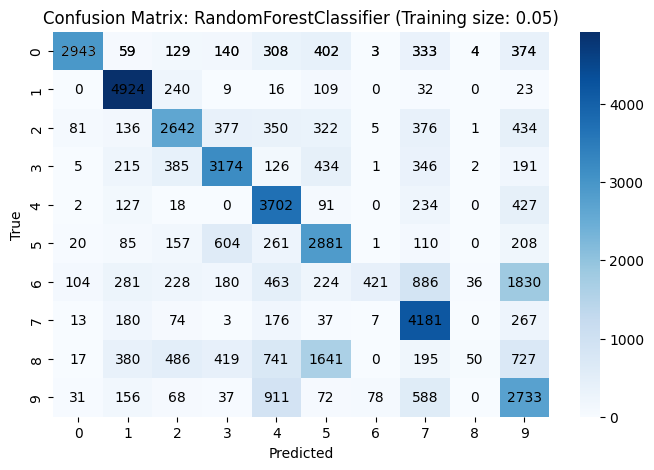

100%|██████████| 5/5 [09:02<00:00, 108.54s/it]




---------Training size: 0.1 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifier: SGDClassifier
Classifier: SGDClassifier, Training size: 0.1, Accuracy: 0.8008666666666666


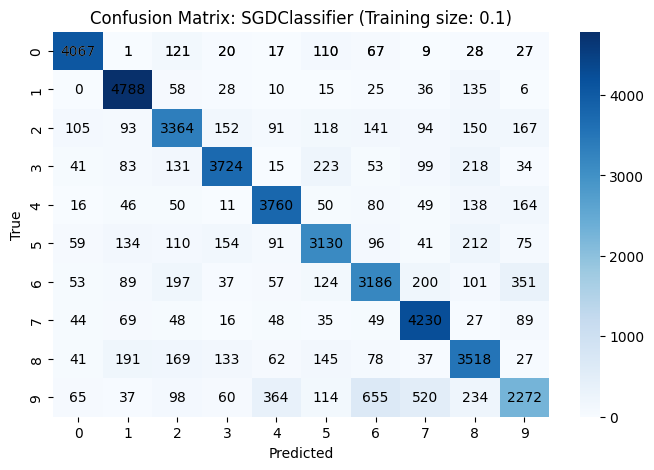

 20%|██        | 1/5 [00:00<00:03,  1.25it/s]



Classifier: MLPClassifier
Classifier: MLPClassifier, Training size: 0.1, Accuracy: 0.7214666666666667


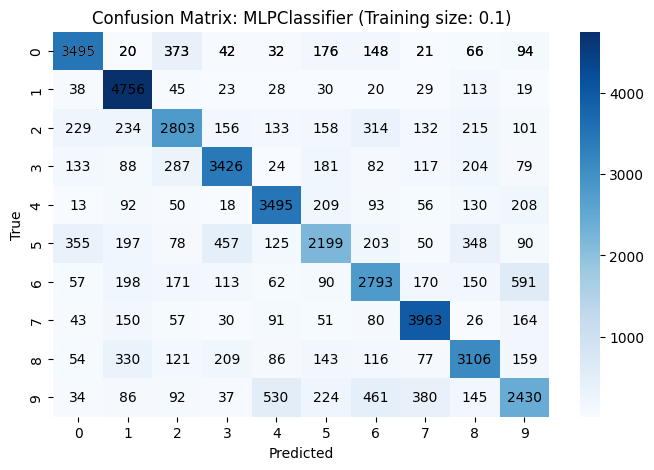

 40%|████      | 2/5 [00:01<00:02,  1.24it/s]



Classifier: SVC
Classifier: SVC, Training size: 0.1, Accuracy: 0.944


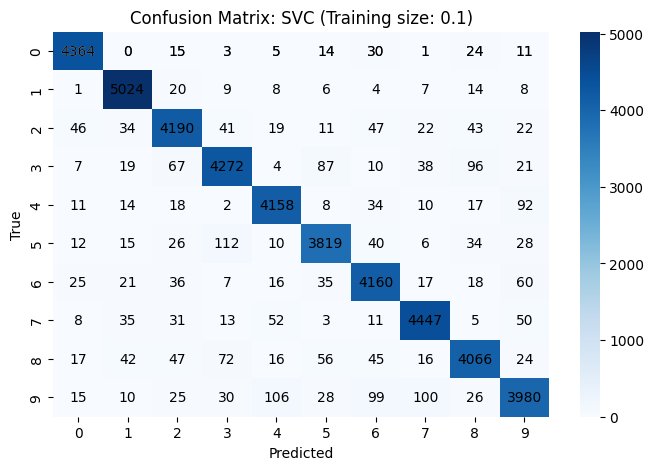

 60%|██████    | 3/5 [00:24<00:22, 11.10s/it]



Classifier: KNeighborsClassifier
Classifier: KNeighborsClassifier, Training size: 0.1, Accuracy: 0.9196888888888889


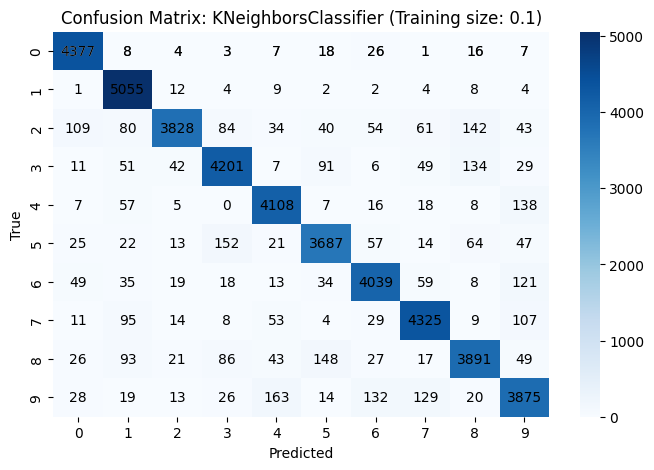

 80%|████████  | 4/5 [00:26<00:07,  7.27s/it]



Classifier: RandomForestClassifier
Classifier: RandomForestClassifier, Training size: 0.1, Accuracy: 0.6443777777777778


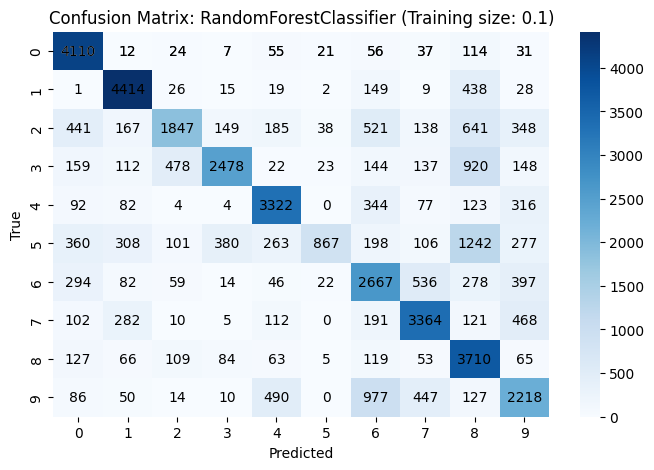

100%|██████████| 5/5 [09:12<00:00, 110.46s/it]




---------Training size: 0.2 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifier: SGDClassifier
Classifier: SGDClassifier, Training size: 0.2, Accuracy: 0.820975


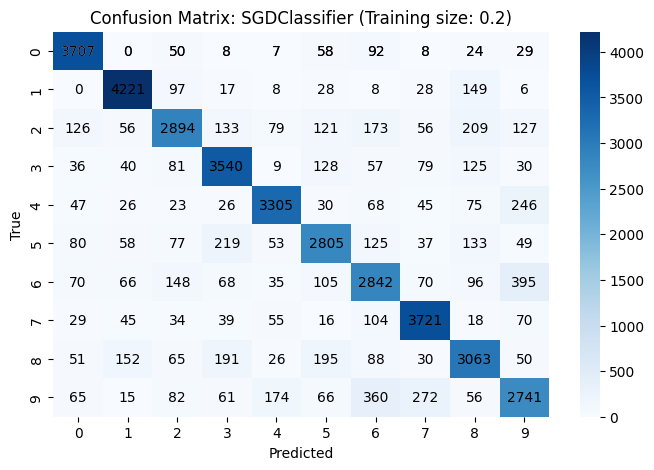

 20%|██        | 1/5 [00:01<00:04,  1.06s/it]



Classifier: MLPClassifier
Classifier: MLPClassifier, Training size: 0.2, Accuracy: 0.838025


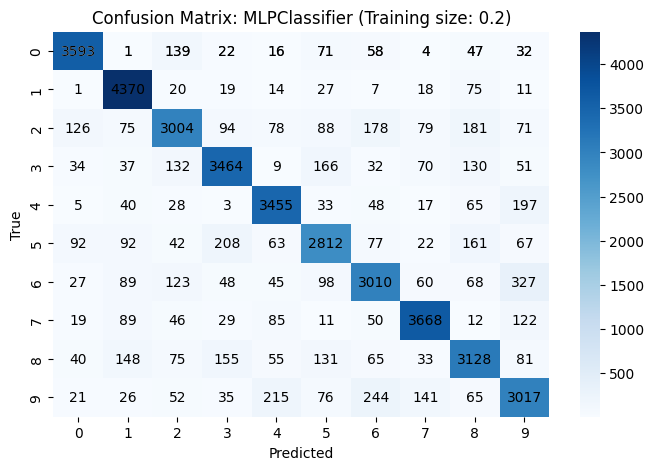

 40%|████      | 2/5 [00:02<00:03,  1.04s/it]



Classifier: SVC
Classifier: SVC, Training size: 0.2, Accuracy: 0.9548


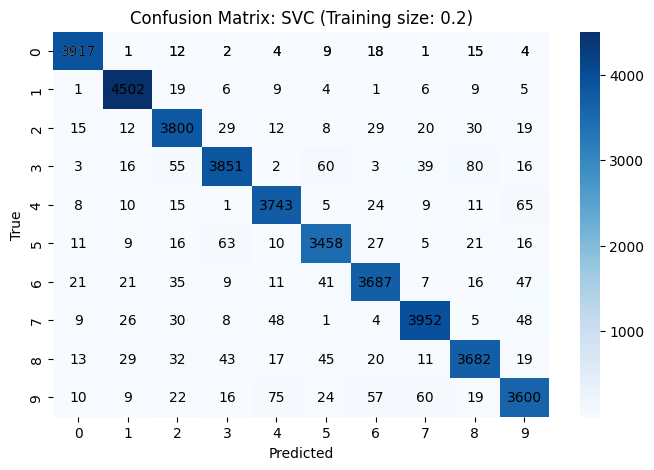

 60%|██████    | 3/5 [00:36<00:32, 16.22s/it]



Classifier: KNeighborsClassifier
Classifier: KNeighborsClassifier, Training size: 0.2, Accuracy: 0.935175


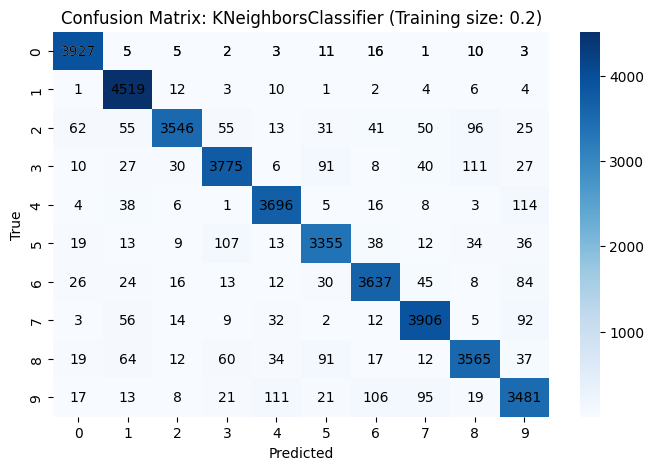

 80%|████████  | 4/5 [00:38<00:10, 10.64s/it]



Classifier: RandomForestClassifier
Classifier: RandomForestClassifier, Training size: 0.2, Accuracy: 0.68645


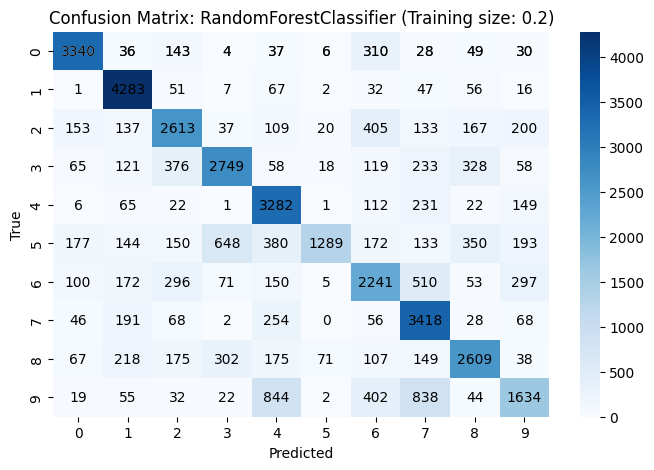

100%|██████████| 5/5 [09:00<00:00, 108.18s/it]




---------Training size: 0.4 -----------


  0%|          | 0/5 [00:00<?, ?it/s]

Classifier: SGDClassifier
Classifier: SGDClassifier, Training size: 0.4, Accuracy: 0.8303666666666667


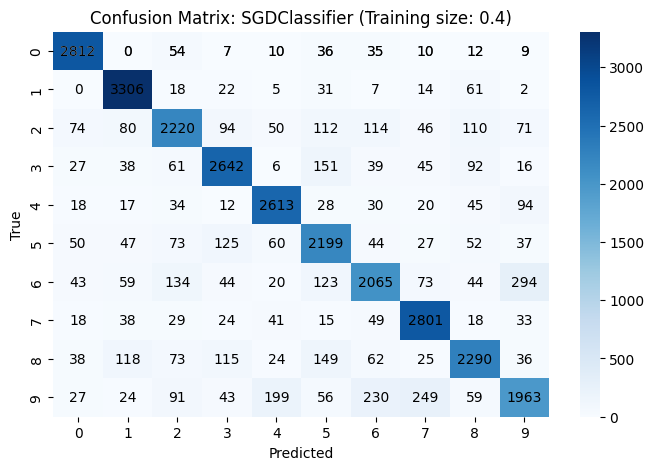

 20%|██        | 1/5 [00:02<00:08,  2.06s/it]



Classifier: MLPClassifier
Classifier: MLPClassifier, Training size: 0.4, Accuracy: 0.8823666666666666


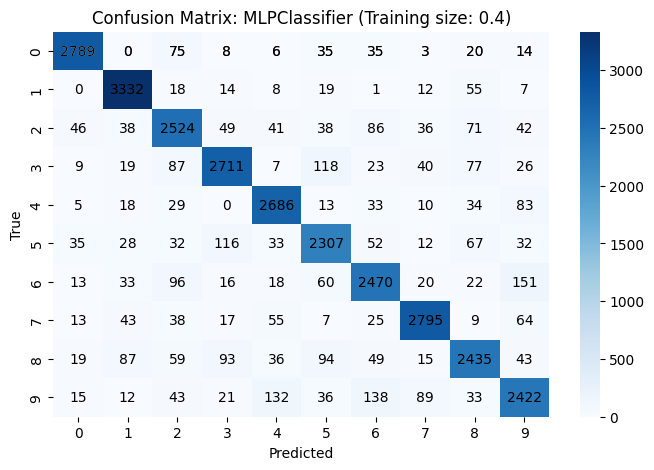

 40%|████      | 2/5 [00:03<00:04,  1.65s/it]



Classifier: SVC
Classifier: SVC, Training size: 0.4, Accuracy: 0.9639333333333333


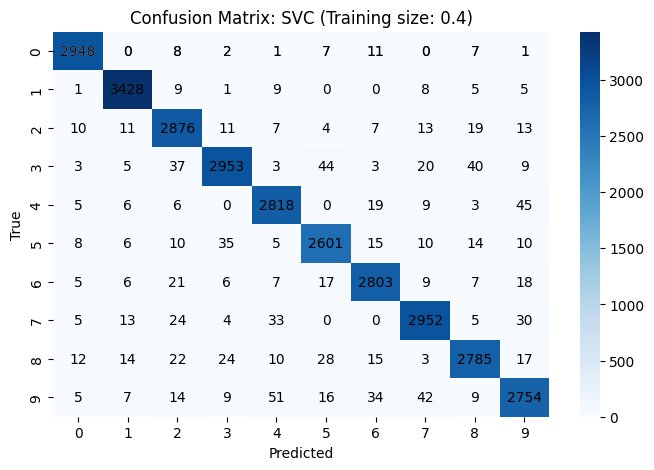

 60%|██████    | 3/5 [00:49<00:43, 21.89s/it]



Classifier: KNeighborsClassifier
Classifier: KNeighborsClassifier, Training size: 0.4, Accuracy: 0.9487666666666666


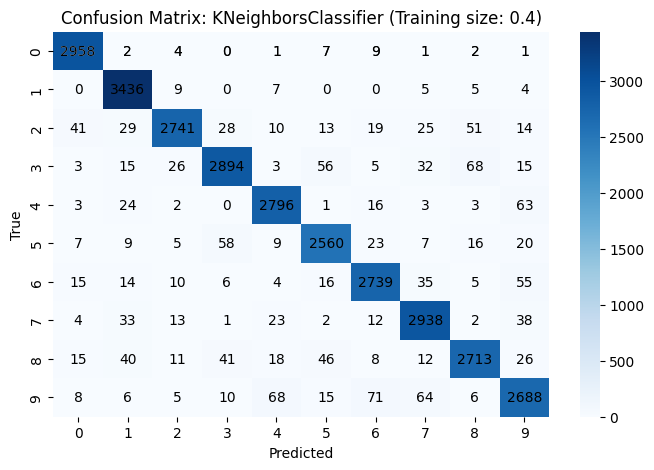

 80%|████████  | 4/5 [00:52<00:14, 14.29s/it]



Classifier: RandomForestClassifier


In [163]:
def evaluate_model_dq_no_grid(classifiers, sample_sizes, batch_size=128, n_batches=50):
    results = {name: [] for name in classifiers.keys()}
    
    for size in sample_sizes:
        print(f"---------Training size: {size} -----------")
        # Take a subset of the training data
        X_train, X_test, y_train, y_test = train_test_split(data_pca, labels, train_size=size, random_state=42)
        
        for name, clf in tqdm(classifiers.items()):
            print(f"Classifier: {name}")
            if name == "RandomForestClassifier":
                # m-out-of-n bootstrap for RandomForestClassifier
                m = int(2 * np.sqrt(len(X_train)))  # Adjusted to len(X_train)
                trees = []
                for _ in range(n_batches):  # Grow `n_batches` trees
                    X_bootstrap, y_bootstrap = m_out_of_n_bootstrap(X_train, y_train, m)
                    if len(X_bootstrap) == 0 or len(y_bootstrap) == 0:
                        continue
                    tree = clf.fit(X_bootstrap, y_bootstrap)
                    trees.append(tree)
                
                # Make predictions by aggregating the trees
                y_pred = np.mean([tree.predict(X_test) for tree in trees], axis=0)
                y_pred = np.round(y_pred).astype(int)  # For classification
                
            
            # Check if classifier supports partial_fit
            elif hasattr(clf, "partial_fit"):
                # Mini-batch training with the best estimator
                X_train, y_train = shuffle(X_train, y_train, random_state=42)
                for i in range(0, len(X_train), batch_size):
                    end = i + batch_size
                    clf.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(labels))
            else:
                # Train the model with the entire subset
                clf.fit(X_train, y_train)
                # Make combined predictions
            if name != "RandomForestClassifier":
                y_pred = clf.predict(X_test)
            
            
            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            results[name].append(accuracy)
            
            print(f"Classifier: {name}, Training size: {size}, Accuracy: {accuracy}")
            plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix: {name} (Training size: {size})")
            print("\n")
    
    return results
classifiers = {
    "SGDClassifier": SGDClassifier(max_iter=10000, tol=1e-3, loss ='perceptron'),
    "MLPClassifier": MLPClassifier(max_iter=10000,hidden_layer_sizes=(100,)),
    "SVC": SVC(kernel = 'rbf',C=10),
    "KNeighborsClassifier": KNeighborsClassifier(weights='distance', n_neighbors=5),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=1000)
}
# Define the sample sizes to evaluate
sample_sizes = [0.05,0.1,0.2,0.4,0.8]

# Evaluate the models
results = evaluate_model_dq_no_grid(classifiers, sample_sizes)

# Plot the results
plt.figure(figsize=(12, 8))
for name, accuracies in results.items():
    plt.plot(sample_sizes, accuracies, marker='o', label=name)
plt.xlabel("Training Sample Size")
plt.ylabel("Accuracy")
plt.title("Classification Performance as a Function of Training Sample Size with Grid Search and Batching")
plt.legend()
plt.grid(True)
plt.show()

Classifier: KNeighborsClassifier
Accuracy: 0.9356


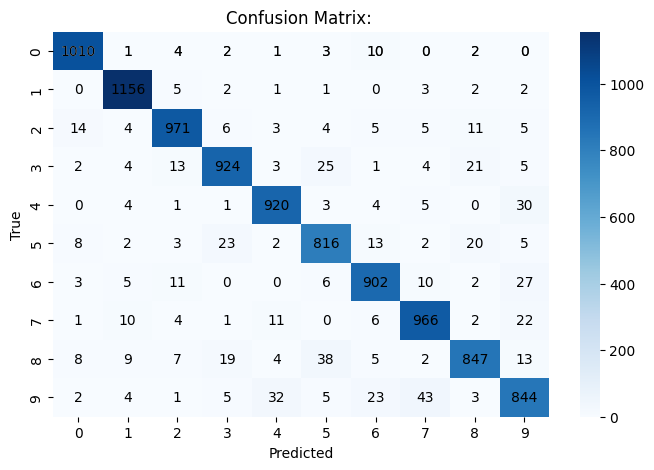

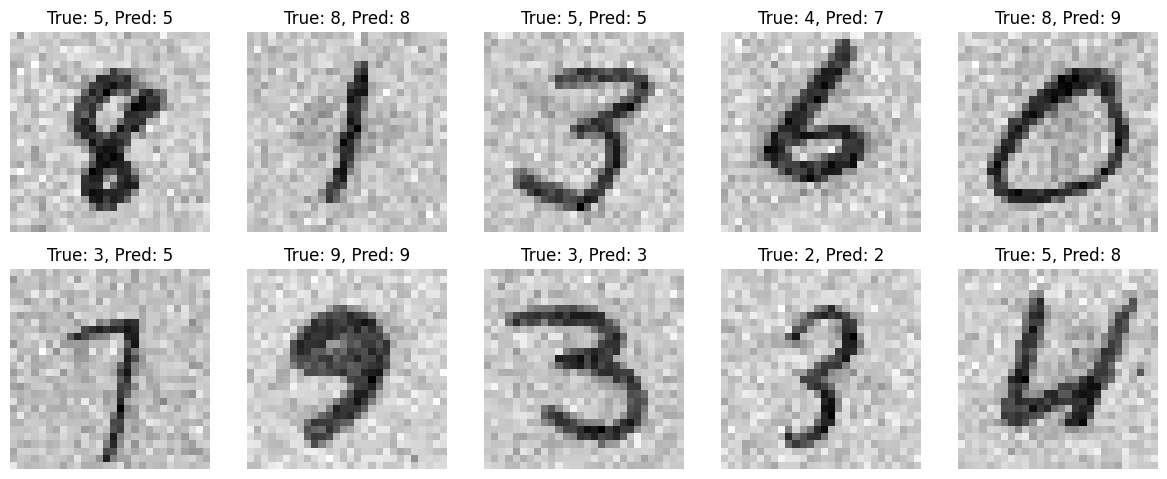

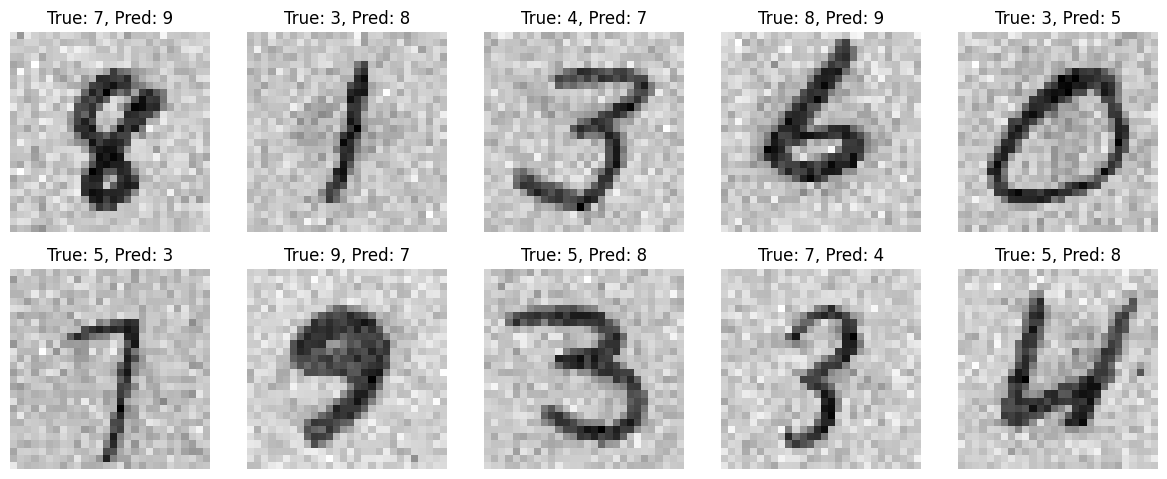

In [186]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_kpca, labels, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = KNeighborsClassifier(weights='distance', n_neighbors=5, n_jobs=-1)
print(f"Classifier: KNeighborsClassifier")
            
# n_batches = 25

# # Divide the data into n_batches
# skf = StratifiedKFold(n_splits=n_batches, shuffle=True, random_state=42)
# sub_models = []
# for train_index, _ in tqdm(skf.split(X_train, y_train)):
#     X_batch, y_batch = X_train[train_index], y_train[train_index]
#     sub_model = clone(clf)
#     sub_model.fit(X_batch, y_batch)
#     sub_models.append(sub_model)

# # Function to combine predictions
# def combined_predict(X):
#     predictions = np.array([model.predict(X) for model in sub_models])
#     final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
#     return final_predictions

# # Make combined predictions
# y_pred = combined_predict(X_test)

# Train
# Train
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix: ")




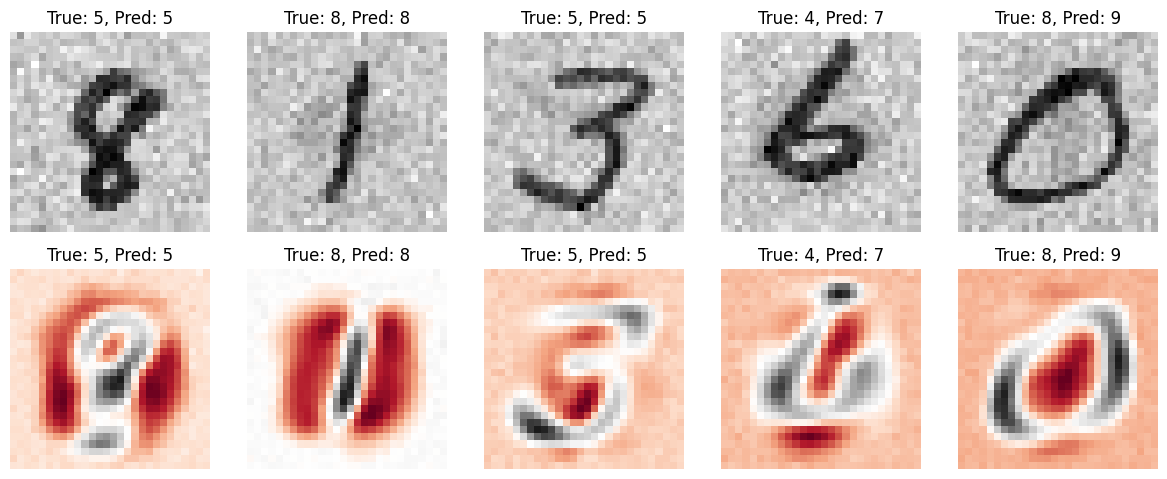

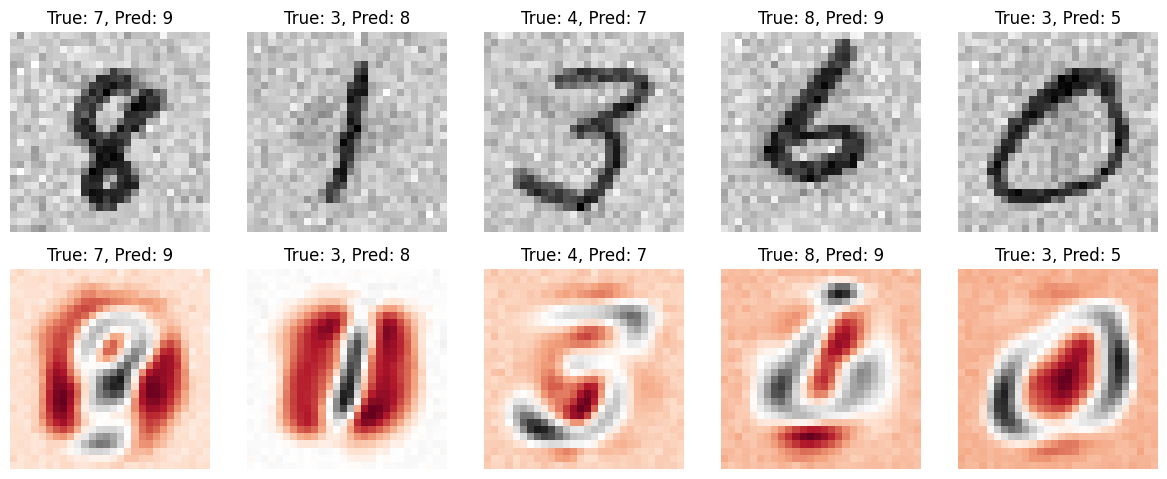

In [198]:
# Define a confidence threshold
confidence_threshold = 0.5
low_confidence_mask = np.max(proba, axis=1) < confidence_threshold

# Extract low-confidence samples
low_confidence_indices = np.where(low_confidence_mask)[0]
low_confidence_samples = data[low_confidence_indices]
low_confidence_true_labels = y_test.iloc[low_confidence_indices]  
low_confidence_pred_labels = y_pred[low_confidence_indices]

# Dimension reduction by kpca for visualization
kpca_samples = reconstructed_data_kpca[low_confidence_indices]

# Visualize low-confidence samples
num_samples = min(5, len(low_confidence_samples))  
plt.figure(figsize=(12, 12))
for i in range(num_samples):
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(low_confidence_samples[i].reshape(28, 28), cmap='binary')
    plt.title(f"True: {low_confidence_true_labels.iloc[i]}, Pred: {low_confidence_pred_labels[i]}")
    plt.axis('off')

    plt.subplot(5, 5, 6 + i)
    plt.imshow(kpca_samples[i].reshape(28, 28), cmap='RdGy')
    plt.title(f"True: {low_confidence_true_labels.iloc[i]}, Pred: {low_confidence_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Identify misclassified samples
misclassified_mask = y_test != y_pred
misclassified_indices = np.where(misclassified_mask)[0]
misclassified_samples = X_test[misclassified_indices]
misclassified_true_labels = y_test.iloc[misclassified_indices]  
misclassified_pred_labels = y_pred[misclassified_indices]

# Visualize misclassified samples
num_samples = min(5, len(misclassified_samples))  
plt.figure(figsize=(12, 12))
for i in range(num_samples):
    
    plt.subplot(5, 5, i + 1)
    plt.imshow(low_confidence_samples[i].reshape(28, 28), cmap='binary')
    plt.title(f"True: {misclassified_true_labels.iloc[i]}, Pred: {misclassified_pred_labels[i]}")  
    plt.axis('off')

    plt.subplot(5, 5, 6 + i)
    plt.imshow(kpca_samples[i].reshape(28, 28), cmap='RdGy')
    plt.title(f"True: {misclassified_true_labels.iloc[i]}, Pred: {misclassified_pred_labels[i]}")  
    plt.axis('off')
plt.tight_layout()
plt.show()

# Clustering

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch

In [ ]:
# K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_nmf)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
agg_labels = agg.fit_predict(data_nmf)

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(data_nmf)

# Silhouette Scores
kmeans_silhouette = silhouette_score(data_nmf, kmeans_labels)
agg_silhouette = silhouette_score(data_nmf, agg_labels)
dbscan_silhouette = silhouette_score(data_nmf, dbscan_labels)

# Davies-Bouldin Scores
kmeans_db = davies_bouldin_score(data_nmf, kmeans_labels)
agg_db = davies_bouldin_score(data_nmf, agg_labels)
dbscan_db = davies_bouldin_score(data_nmf, dbscan_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

print(f"K-Means Davies-Bouldin Score: {kmeans_db}")
print(f"Agglomerative Clustering Davies-Bouldin Score: {agg_db}")
print(f"DBSCAN Davies-Bouldin Score: {dbscan_db}")

In [63]:
# K-Means
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(images_pca)

In [19]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=10)
agg_labels_sample = agg.fit_p(data_sample)


In [16]:
import hdbscan

# Apply HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
hdbscan_labels_sample = hdbscan_clusterer.fit_predict(data_sample)

In [59]:
from sklearn.cluster import Birch

# Apply Birch
# birch = Birch(n_clusters=10)
# birch_labels_sample = birch.fit_predict(data_sample)

In [24]:
from sklearn.neighbors import NearestNeighbors
# Fit nearest neighbors on the sampled data
nn = NearestNeighbors(n_neighbors=1)
nn.fit(data_sample)

# Find nearest neighbors for the entire dataset
distances, indices = nn.kneighbors(images_pca)

# Assign cluster labels from the sampled data to the entire dataset
hdbscan_labels = hdbscan_labels_sample[indices.flatten()]
agg_labels = agg_labels_sample[indices.flatten()]
birch_labels = birch_labels_sample[indices.flatten()]

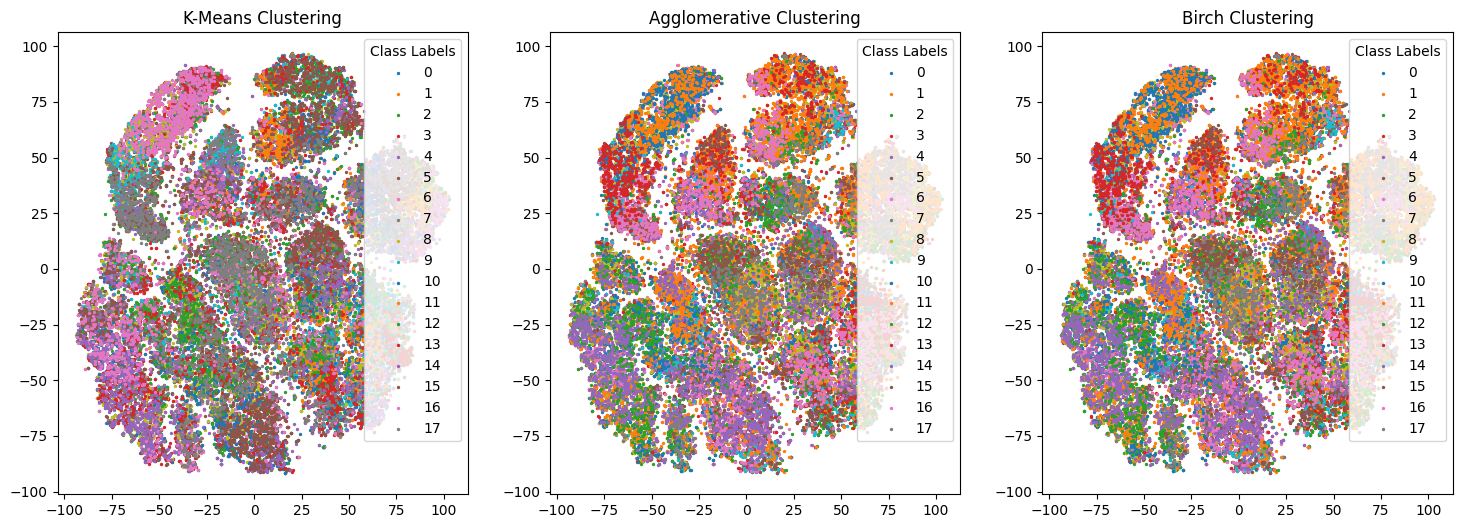

In [72]:

plt.figure(figsize=(18, 6))

# K-Means Clustering
plt.subplot(1, 3, 1)
unique_kmeans_labels = np.unique(kmeans_labels)
for label in unique_kmeans_labels:
    indices = kmeans_labels == label
    plt.scatter(images_tsne[indices, 0], images_tsne[indices, 1], label=str(label), cmap='tap10',s=2)
plt.title("K-Means Clustering")
plt.legend(title="Class Labels")

# Agglomerative Clustering
plt.subplot(1, 3, 2)
unique_agg_labels = np.unique(agg_labels)
for label in unique_agg_labels:
    indices = agg_labels == label
    plt.scatter(images_tsne[indices, 0], images_tsne[indices, 1], label=str(label), cmap='tap10',s=2)
plt.title("Agglomerative Clustering")
plt.legend(title="Class Labels")

plt.subplot(1, 3, 3)
unique_birch_labels = np.unique(birch_labels)
for label in unique_birch_labels:
    indices = birch_labels == label
    plt.scatter(images_tsne[indices, 0], images_tsne[indices, 1], label=str(label), cmap='tap10',s=2)
plt.title("Birch Clustering")
plt.legend(title="Class Labels")


plt.show()

# plt.subplot(1, 3, 2)
# plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=kmedoid_labels, cmap='viridis')
# plt.title("K-Medoids Clustering")

# plt.subplot(1, 3, 3)
# plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=dbscan_labels, cmap='viridis')
# plt.title("DBSCAN Clustering")

plt.show()


## NMF - dimension reduction

In [51]:
# Non-negative Matrix Factorization (NMF)
# Initialize the NMF model 
# Using n_componets = 2 
nmf_model = NMF(n_components=60, init='random', solver='mu', max_iter=5000)

# Fit the model to the entire data
data_nmf = nmf_model.fit_transform(data)

In [52]:
# Plotting the t-SNE results
tsne = TSNE(n_components=2, random_state=42)
images_tsne_nmf = tsne.fit_transform(data_nmf)

In [53]:
sse_nmf = []
for k in tqdm(range(1, 30)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init= 'auto')
    kmeans.fit(data_nmf)
    sse_nmf.append(kmeans.inertia_)



100%|██████████| 29/29 [00:31<00:00,  1.08s/it]


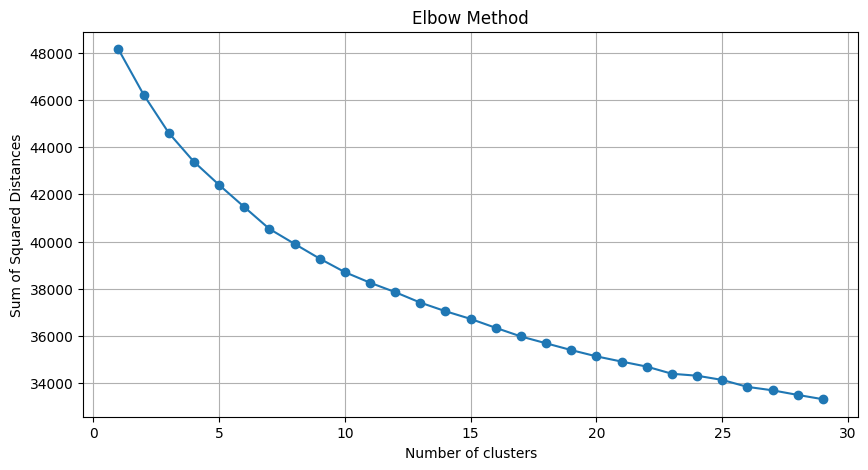

In [54]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 30), sse_nmf, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.grid()
plt.show()

100%|██████████| 23/23 [19:11<00:00, 50.05s/it]


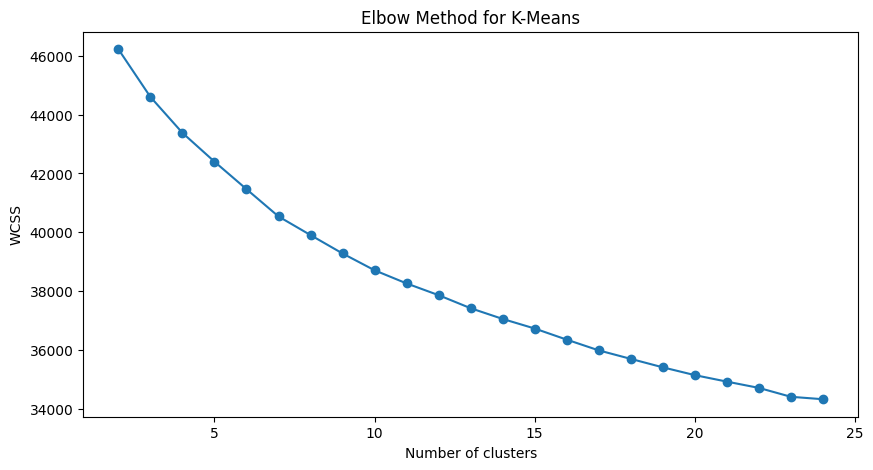

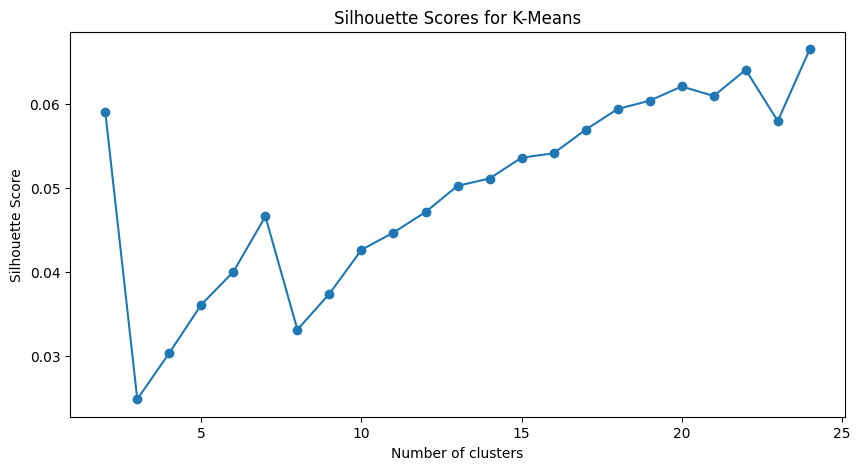

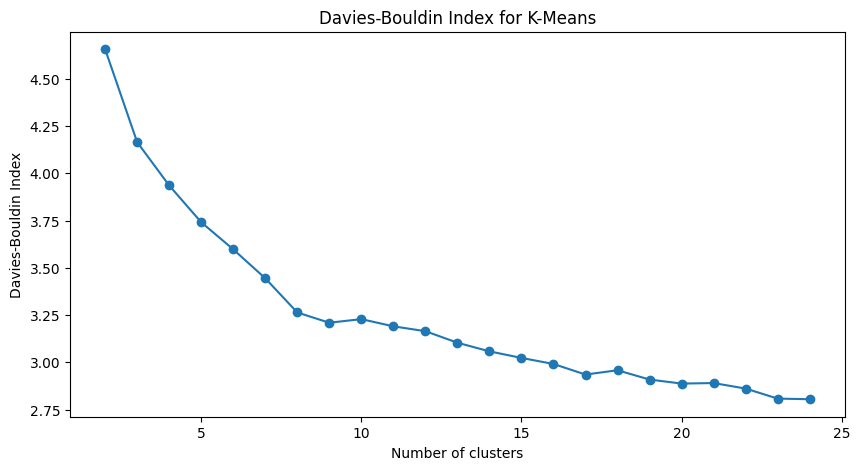

In [89]:
# Initialize lists to store the metrics for K-Means
wcss_kmeans = []
sil_scores_kmeans = []
db_scores_kmeans = []

# Range of cluster numbers
k_range = range(2, 25)

# Calculate metrics for K-Means
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels_kmeans = kmeans.fit_predict(data_nmf)
    wcss_kmeans.append(kmeans.inertia_)
    sil_scores_kmeans.append(silhouette_score(data_nmf, labels_kmeans))
    db_scores_kmeans.append(davies_bouldin_score(data_nmf, labels_kmeans))



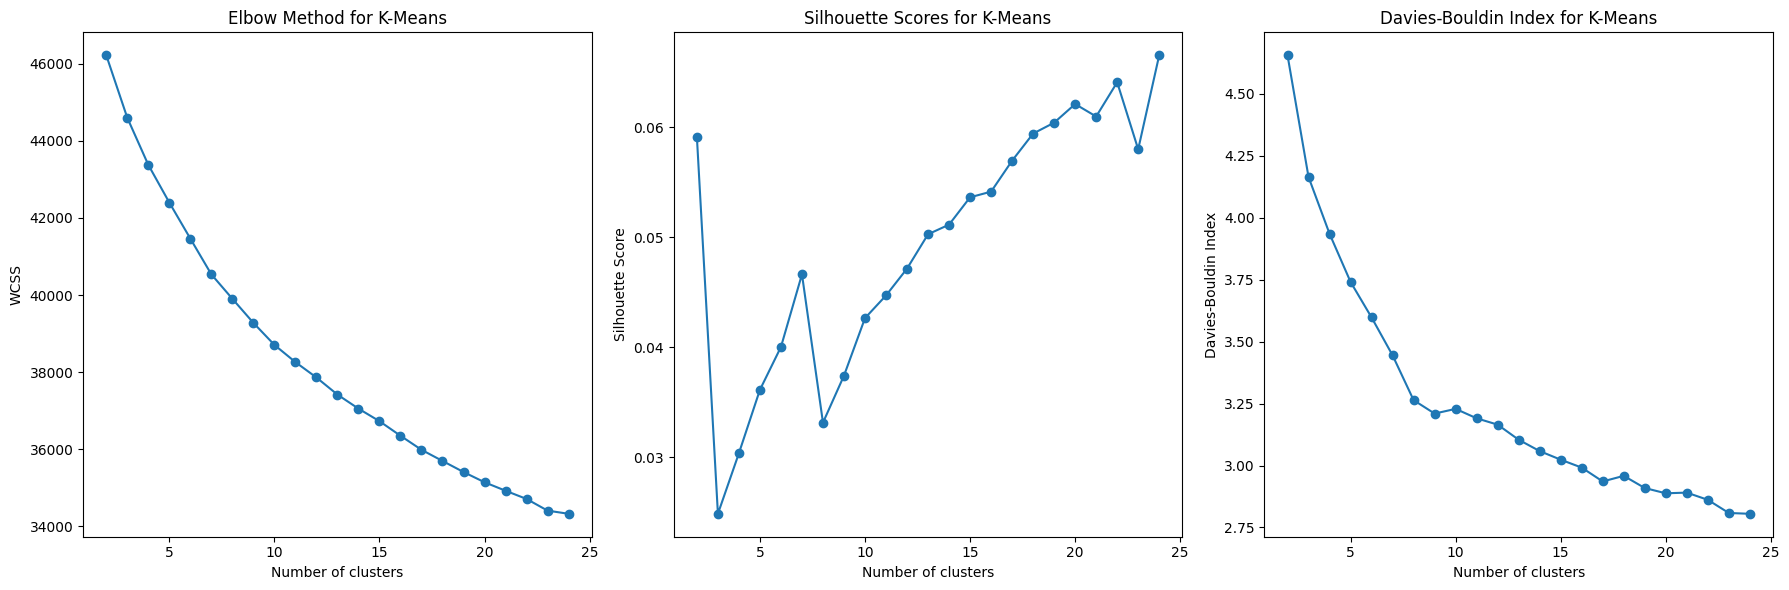

In [216]:
# Plotting the results in a single figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Elbow Method for K-Means
axs[0].plot(k_range, wcss_kmeans, marker='o')
axs[0].set_title('Elbow Method for K-Means')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('WCSS')

# Plot Silhouette Scores for K-Means
axs[1].plot(k_range, sil_scores_kmeans, marker='o')
axs[1].set_title('Silhouette Scores for K-Means')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Silhouette Score')

# Plot Davies-Bouldin Index for K-Means
axs[2].plot(k_range, db_scores_kmeans, marker='o')
axs[2].set_title('Davies-Bouldin Index for K-Means')
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('Davies-Bouldin Index')

plt.tight_layout()

plt.show()

In [ ]:
# Silhouette Analysis
silhouette_scores = []
for k in tqdm(range(2, 30)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(data_nmf)
    silhouette_scores.append(silhouette_score(data_nmf, labels))



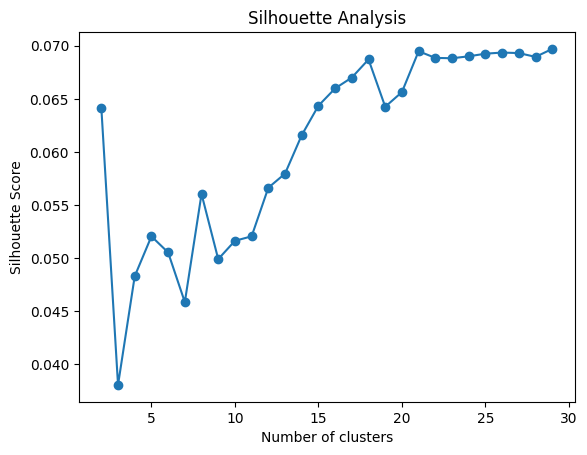

In [62]:
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [90]:
from sklearn.cluster import MiniBatchKMeans
# Define batch size and number of local clusters
batch_size = 5000
num_local_clusters = 100  # Number of clusters for local clustering

# Perform local clustering and collect centroids
all_centroids = []

for i in range(0, data_nmf.shape[0], batch_size):
    batch_data = data_nmf[i:i+batch_size]
    local_kmeans = MiniBatchKMeans(n_clusters=num_local_clusters, batch_size=100, random_state=0, n_init='auto')
    local_kmeans.fit(batch_data)
    all_centroids.append(local_kmeans.cluster_centers_)

# Combine all centroids into a single array
all_centroids = np.vstack(all_centroids)

In [211]:
from sklearn.mixture import GaussianMixture

In [212]:
def global_clustering_and_label_propagation(global_clustering_algorithm):
    # Perform global clustering on the collected centroids
    if isinstance(global_clustering_algorithm, (KMeans, MiniBatchKMeans, Birch, GaussianMixture)):
        global_clustering_algorithm.fit(all_centroids)
        global_centroid_labels = global_clustering_algorithm.predict(all_centroids)
    elif isinstance(global_clustering_algorithm, hdbscan.HDBSCAN):
        global_clustering_algorithm.fit(all_centroids)
        global_centroid_labels = global_clustering_algorithm.labels_
    elif isinstance(global_clustering_algorithm, AgglomerativeClustering):
        global_clustering_algorithm.fit(all_centroids)
        global_centroid_labels = global_clustering_algorithm.labels_
    
    # Create a mapping from local centroid to global cluster
    local_to_global_mapping = {}
    centroid_idx = 0
    for i in range(0, data_nmf.shape[0], batch_size):
        local_kmeans = MiniBatchKMeans(n_clusters=num_local_clusters, batch_size=100, random_state=0, n_init='auto')
        local_kmeans.fit(data_nmf[i:i+batch_size])
        for j, centroid in enumerate(local_kmeans.cluster_centers_):
            local_to_global_mapping[tuple(centroid)] = global_centroid_labels[centroid_idx]
            centroid_idx += 1

    # Assign global cluster labels to all data points based on their nearest local centroid
    labels = []
    for i in range(0, data_nmf.shape[0], batch_size):
        batch_data = data_nmf[i:i+batch_size]
        local_kmeans = MiniBatchKMeans(n_clusters=num_local_clusters, batch_size=100, random_state=0, n_init='auto')
        local_kmeans.fit(batch_data)
        batch_labels = []
        for point in batch_data:
            nearest_centroid = local_kmeans.cluster_centers_[local_kmeans.predict([point])[0]]
            batch_labels.append(local_to_global_mapping[tuple(nearest_centroid)])
        labels.extend(batch_labels)

    return np.array(labels)

In [225]:

def plot_clusters_subplots(data, labels_list, titles):
    plt.figure(figsize=(16, 12))
    for i, (labels, title) in enumerate(zip(labels_list, titles)):
        plt.subplot(2, 2, i + 1)
        if title == "Original Data":
            scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10',s=2)
        else:
            scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', s=2)
        plt.colorbar(scatter, ticks=range(10))
        plt.title(title)
    plt.show()



In [228]:
k = 10
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
# Define batch size and number of local clusters
batch_size = 5000
num_local_clusters = 500  # Number of clusters for local clustering

# Perform local clustering and collect centroids
all_centroids = []

for i in range(0, data_nmf.shape[0], batch_size):
    batch_data = data_nmf[i:i+batch_size]
    local_kmeans = MiniBatchKMeans(n_clusters=num_local_clusters, batch_size=100, random_state=0, n_init='auto')
    local_kmeans.fit(batch_data)
    all_centroids.append(local_kmeans.cluster_centers_)

# Combine all centroids into a single array
all_centroids = np.vstack(all_centroids)
# Global Clustering with MiniBatchKMeans
kmeans_global = KMeans(n_clusters=k, random_state=0, n_init='auto')
kmeans_labels = global_clustering_and_label_propagation(kmeans_global)
print("KMeans Global Cluster Counts:", np.unique(kmeans_labels, return_counts=True))

# Global Clustering with Agglomerative Clustering
agg_global = AgglomerativeClustering(n_clusters=k)
agg_labels = global_clustering_and_label_propagation(agg_global)
print("Agglomerative Global Cluster Counts:", np.unique(agg_labels, return_counts=True))

# Global Clustering with Birch
gm_global = GaussianMixture(n_components=k)
gm_labels = global_clustering_and_label_propagation(gm_global)
print("Birch Global Cluster Counts:", np.unique(gm_labels, return_counts=True))

KMeans Global Cluster Counts: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([4033, 5057, 6500, 5270, 3350, 5875, 3674, 2943, 7227, 6071],
      dtype=int64))
Agglomerative Global Cluster Counts: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([5671, 6004, 2610, 3585, 8795, 7437, 6283, 4116, 2058, 3441],
      dtype=int64))
Birch Global Cluster Counts: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([5741, 4508, 6404, 2718, 6378, 4492, 4228, 3068, 6657, 5806],
      dtype=int64))


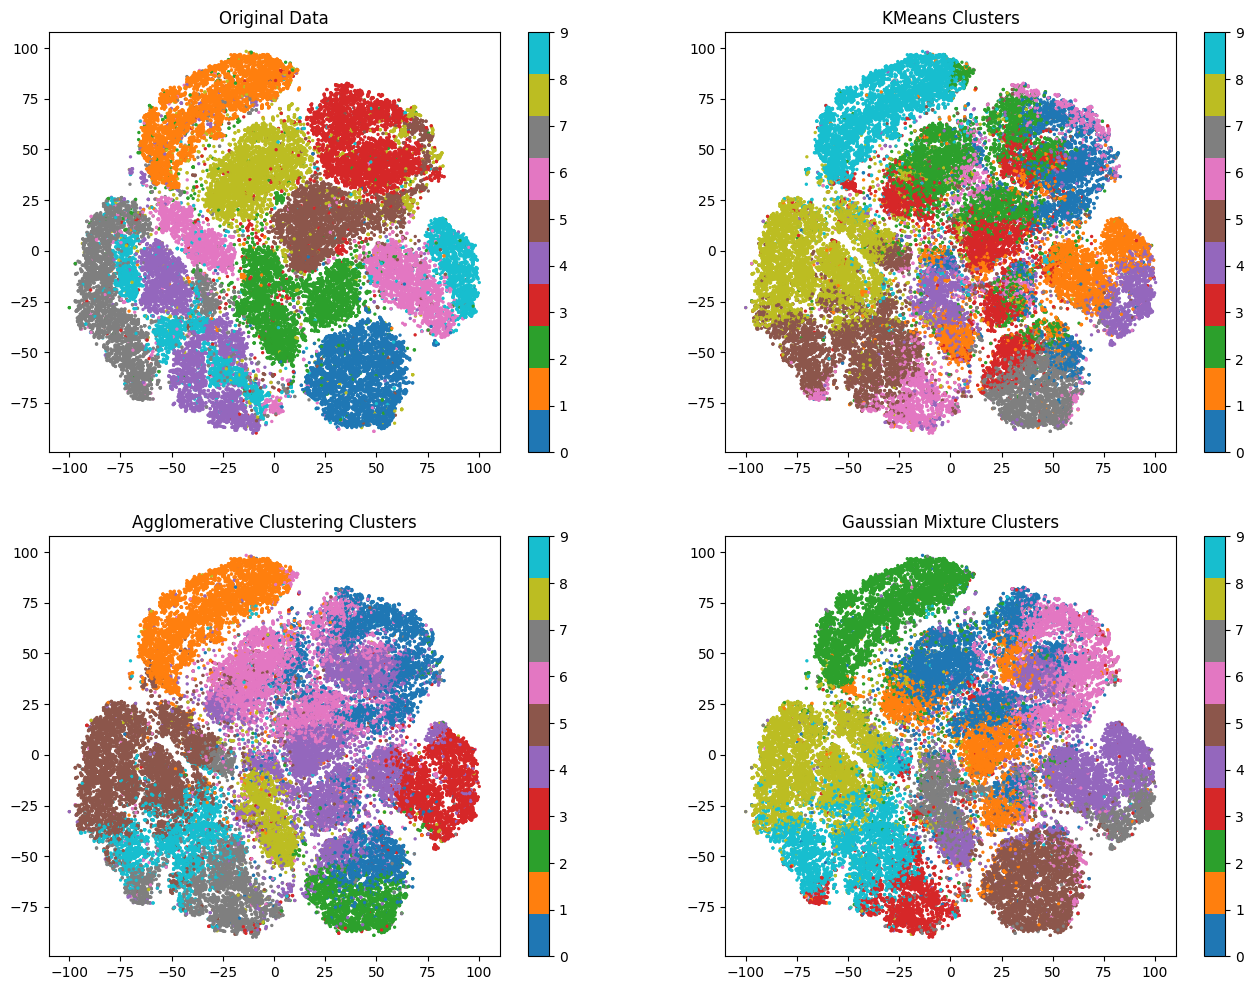

In [229]:
labels_data = df["label"]
# Titles for each subplot
titles = ["Original Data", "KMeans Clusters", "Agglomerative Clustering Clusters", "Gaussian Mixture Clusters"]

# Labels for original data (all zeros, no clustering)
original_labels = labels_data

# List of labels from different clustering algorithms including original data
labels_list = [original_labels, kmeans_labels, agg_labels, gm_labels]

# Plot all clusters in subplots
plot_clusters_subplots(images_tsne_nmf, labels_list, titles)